In [1]:
# 
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import missingno as msno


In [2]:
file_path = r"C:\Users\chimi\Desktop\Python Data Science Projects\Cocoa Production\Data Cleaning\weather_datapreprocessed.csv"
weather_df = pd.read_csv(file_path)


In [3]:
weather_df.head(5)

,Country,Region,datetime,tempmax,tempmin,temp,dew,humidity,precip,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,Ashanti,Ghana,2013-01-01,30.3,16.6,23.6,15.9,64.8,0.0,25.2,38.5,9.3,7.0,240.6,20.8,9
1,Ashanti,Ghana,2013-01-02,32.4,16.6,24.1,13.2,54.9,0.0,18.7,46.8,10.4,5.6,247.8,21.4,9
2,Ashanti,Ghana,2013-01-03,30.5,19.7,25.0,16.8,62.8,0.0,9.4,40.9,68.1,5.0,198.4,17.1,8
3,Ashanti,Ghana,2013-01-04,29.2,18.9,22.8,16.2,67.9,0.0,12.6,357.3,83.4,NaN,141.8,12.1,6
4,Ashanti,Ghana,2013-01-05,32.4,17.5,24.1,13.7,57.1,0.0,16.2,18.8,83.3,8.0,243.9,21.0,9


In [4]:
# Correct -incorrect naming
weather_df.rename(columns={'Country': 'Region', 'Region': 'Country'}, inplace=True)

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19030 entries, 0 to 19029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          19030 non-null  object 
 1   Country         19030 non-null  object 
 2   datetime        19030 non-null  object 
 3   tempmax         19030 non-null  float64
 4   tempmin         19030 non-null  float64
 5   temp            19030 non-null  float64
 6   dew             19030 non-null  float64
 7   humidity        19030 non-null  float64
 8   precip          19030 non-null  float64
 9   windspeed       19030 non-null  float64
 10  winddir         19030 non-null  float64
 11  cloudcover      19030 non-null  float64
 12  visibility      18372 non-null  float64
 13  solarradiation  19030 non-null  float64
 14  solarenergy     19030 non-null  float64
 15  uvindex         19030 non-null  int64  
dtypes: float64(12), int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
# Convert datetime to datetimeformat
weather_df['Date'] = pd.to_datetime(weather_df['datetime'])


In [7]:
weather_df.drop(columns=['datetime'],inplace=True)

In [8]:
weather_df.describe()

,tempmax,tempmin,temp,dew,humidity,precip,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex
count,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,18372.000000,19030.000000,19030.000000,19030.000000
mean,31.148056,23.986674,26.942727,23.312780,81.935681,3.930636,18.955985,209.853663,63.473363,13.288025,198.517635,17.144556,7.004834
std,2.612864,1.834471,1.436286,1.995584,7.348869,9.634817,7.130037,34.632228,17.858392,4.136290,53.173992,4.587967,1.842411
min,24.000000,0.600000,21.800000,-1.100000,19.000000,0.000000,5.000000,1.700000,0.000000,0.000000,12.200000,1.100000,1.000000
25%,29.100000,22.900000,25.800000,22.700000,79.800000,0.100000,14.625000,202.200000,54.200000,10.800000,156.700000,13.500000,6.000000
50%,31.100000,24.000000,27.100000,23.600000,83.300000,1.300000,18.400000,215.900000,66.900000,13.000000,204.000000,17.600000,7.000000
75%,32.800000,25.200000,28.100000,24.400000,86.300000,4.000000,22.300000,226.700000,76.200000,15.900000,239.900000,20.700000,8.000000
max,43.100000,29.000000,31.500000,27.200000,96.800000,229.813000,179.600000,359.900000,100.000000,26.000000,321.700000,27.100000,10.000000


In [49]:
# Select the weather variables
weather_variables = ['temp', 'humidity', 'precip', 'windspeed', 'winddir', 'cloudcover', 'visibility',
                     'solarradiation', 'solarenergy', 'uvindex']

# Group the data by region and calculate the five-number summary for each variable
summary_df = weather_df.groupby('Region')[weather_variables].describe().transpose()

# Display the five-number summary by region
print(summary_df)


Region             Ashanti      Central      Eastern        Volta      Western
temp    count  3806.000000  3806.000000  3806.000000  3806.000000  3806.000000
        mean     26.129427    27.035102    27.243615    27.261482    27.044009
        std       1.375926     1.349042     1.389968     1.455946     1.295866
        min      21.800000    23.300000    23.000000    22.900000    23.600000
        25%      25.100000    26.000000    26.100000    26.000000    26.000000
...                    ...          ...          ...          ...          ...
uvindex min       1.000000     1.000000     1.000000     1.000000     2.000000
        25%       6.000000     5.000000     5.000000     5.000000     5.000000
        50%       8.000000     7.000000     7.000000     7.000000     7.000000
        75%       9.000000     9.000000     8.000000     8.000000     8.000000
        max      10.000000    10.000000    10.000000    10.000000    10.000000

[80 rows x 5 columns]


In [ ]:
# Saving a summary 
summary_df.to_csv('')

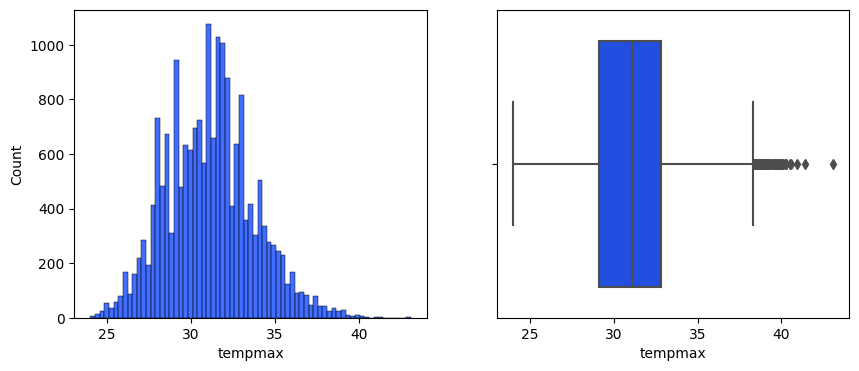

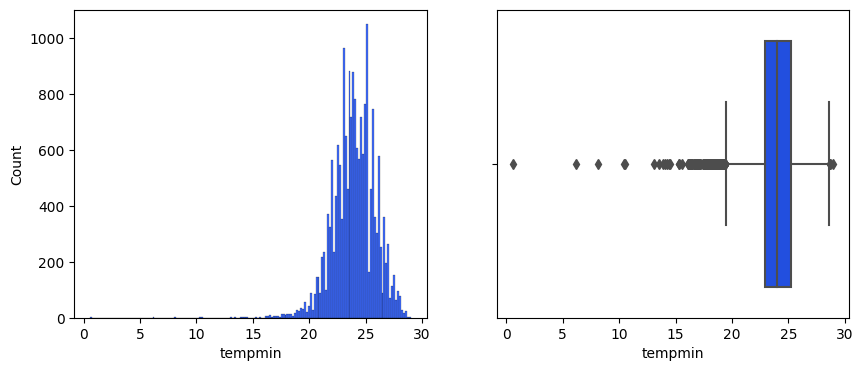

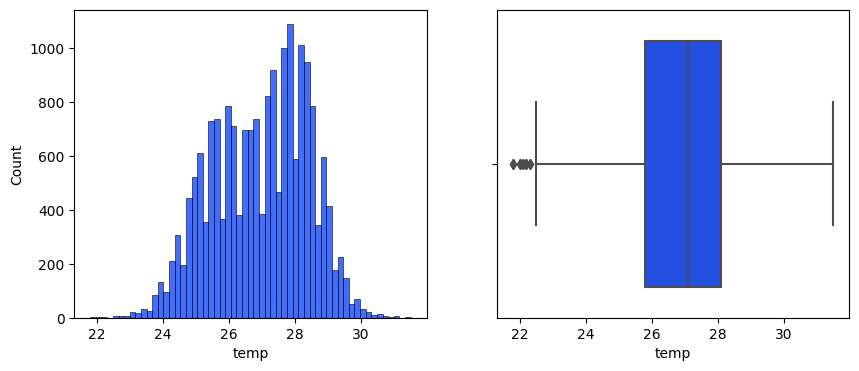

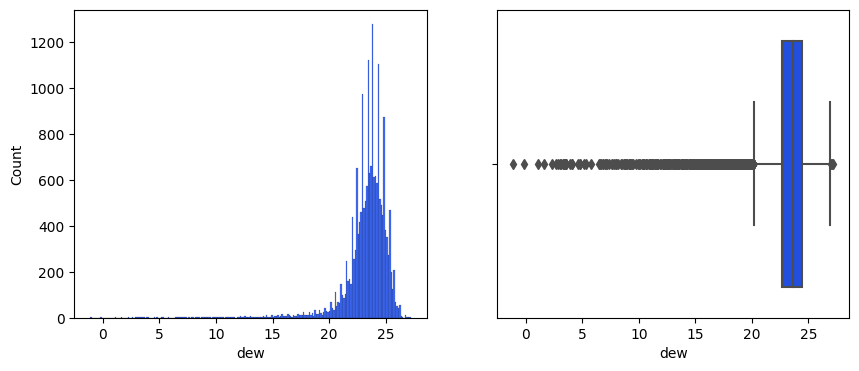

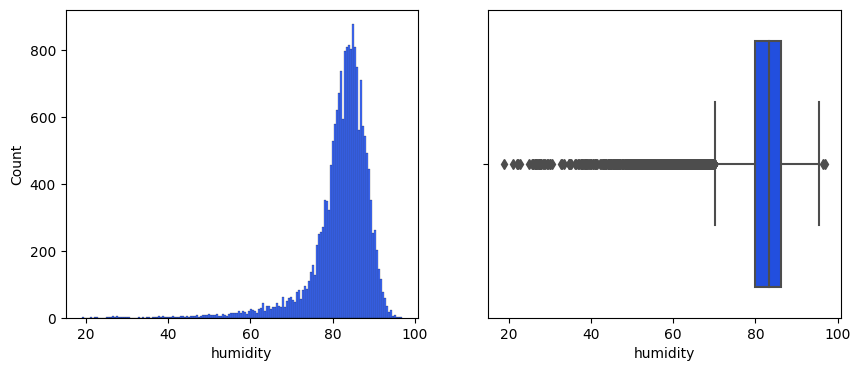

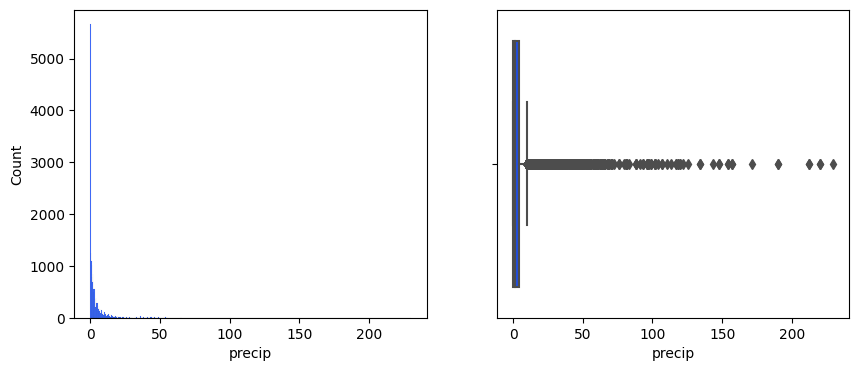

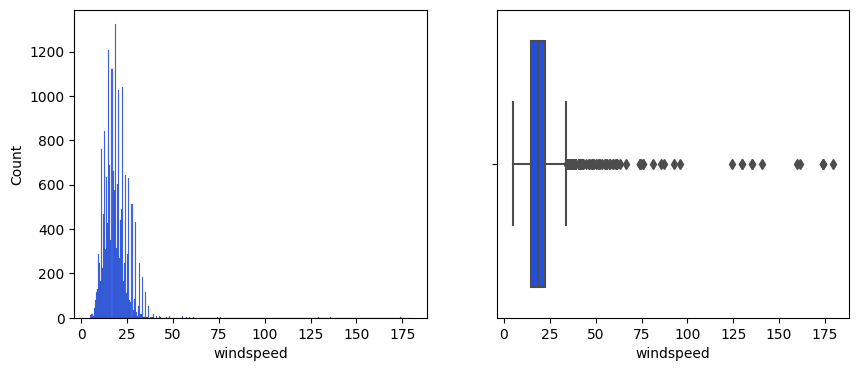

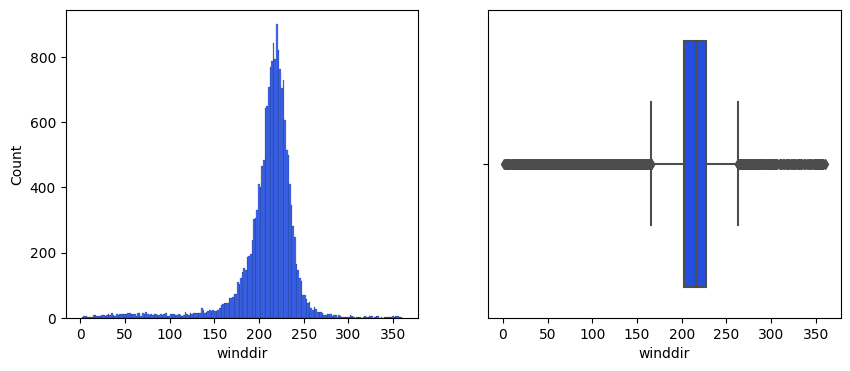

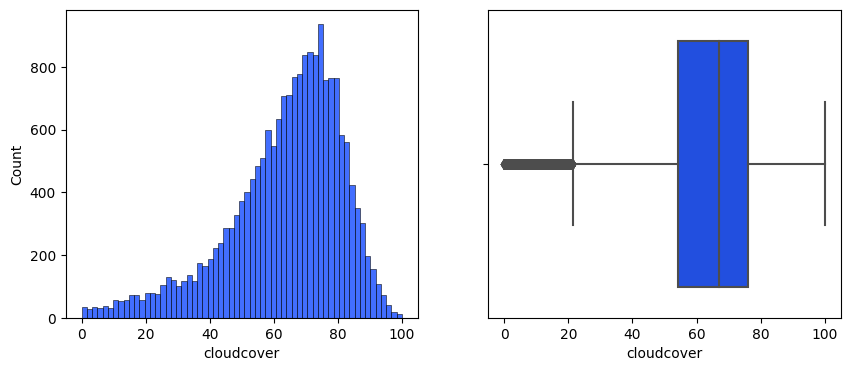

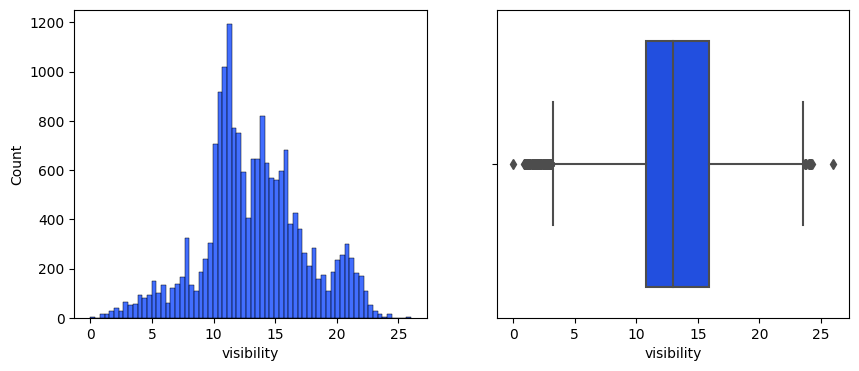

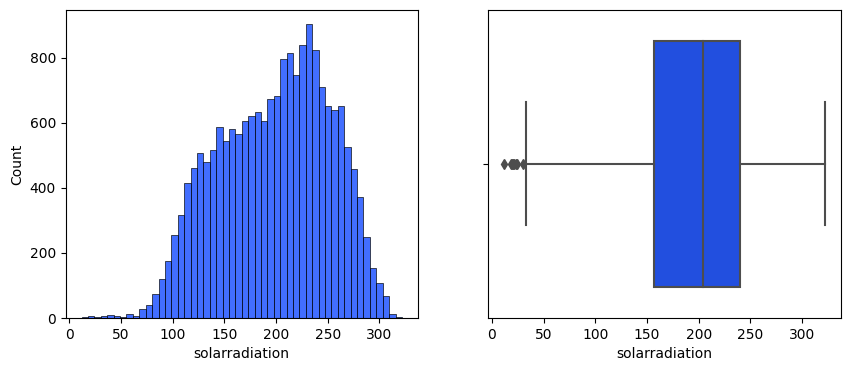

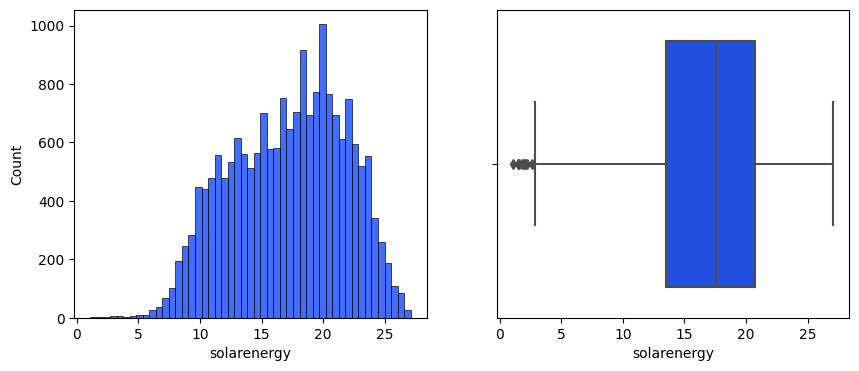

In [10]:
# Univariate Analysis
# What is the distribution of the predictor variables in the dataset?
# Filter numerical columns
# Skewed distribution- Majority have skewed or assymetrical distribution.
# Are there any outliers or extreme values in the dataset? Yes
numerical_data = weather_df[['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'windspeed',
       'winddir', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy']]
for i , cols in enumerate(numerical_data.columns):
    sns.set_palette('bright')
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(data=numerical_data,x=cols,ax=ax[0])
    sns.boxplot(x=cols,data=numerical_data,ax=ax[1])


C:\Users\chimi\AppData\Local\Temp\ipykernel_13420\1717338410.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


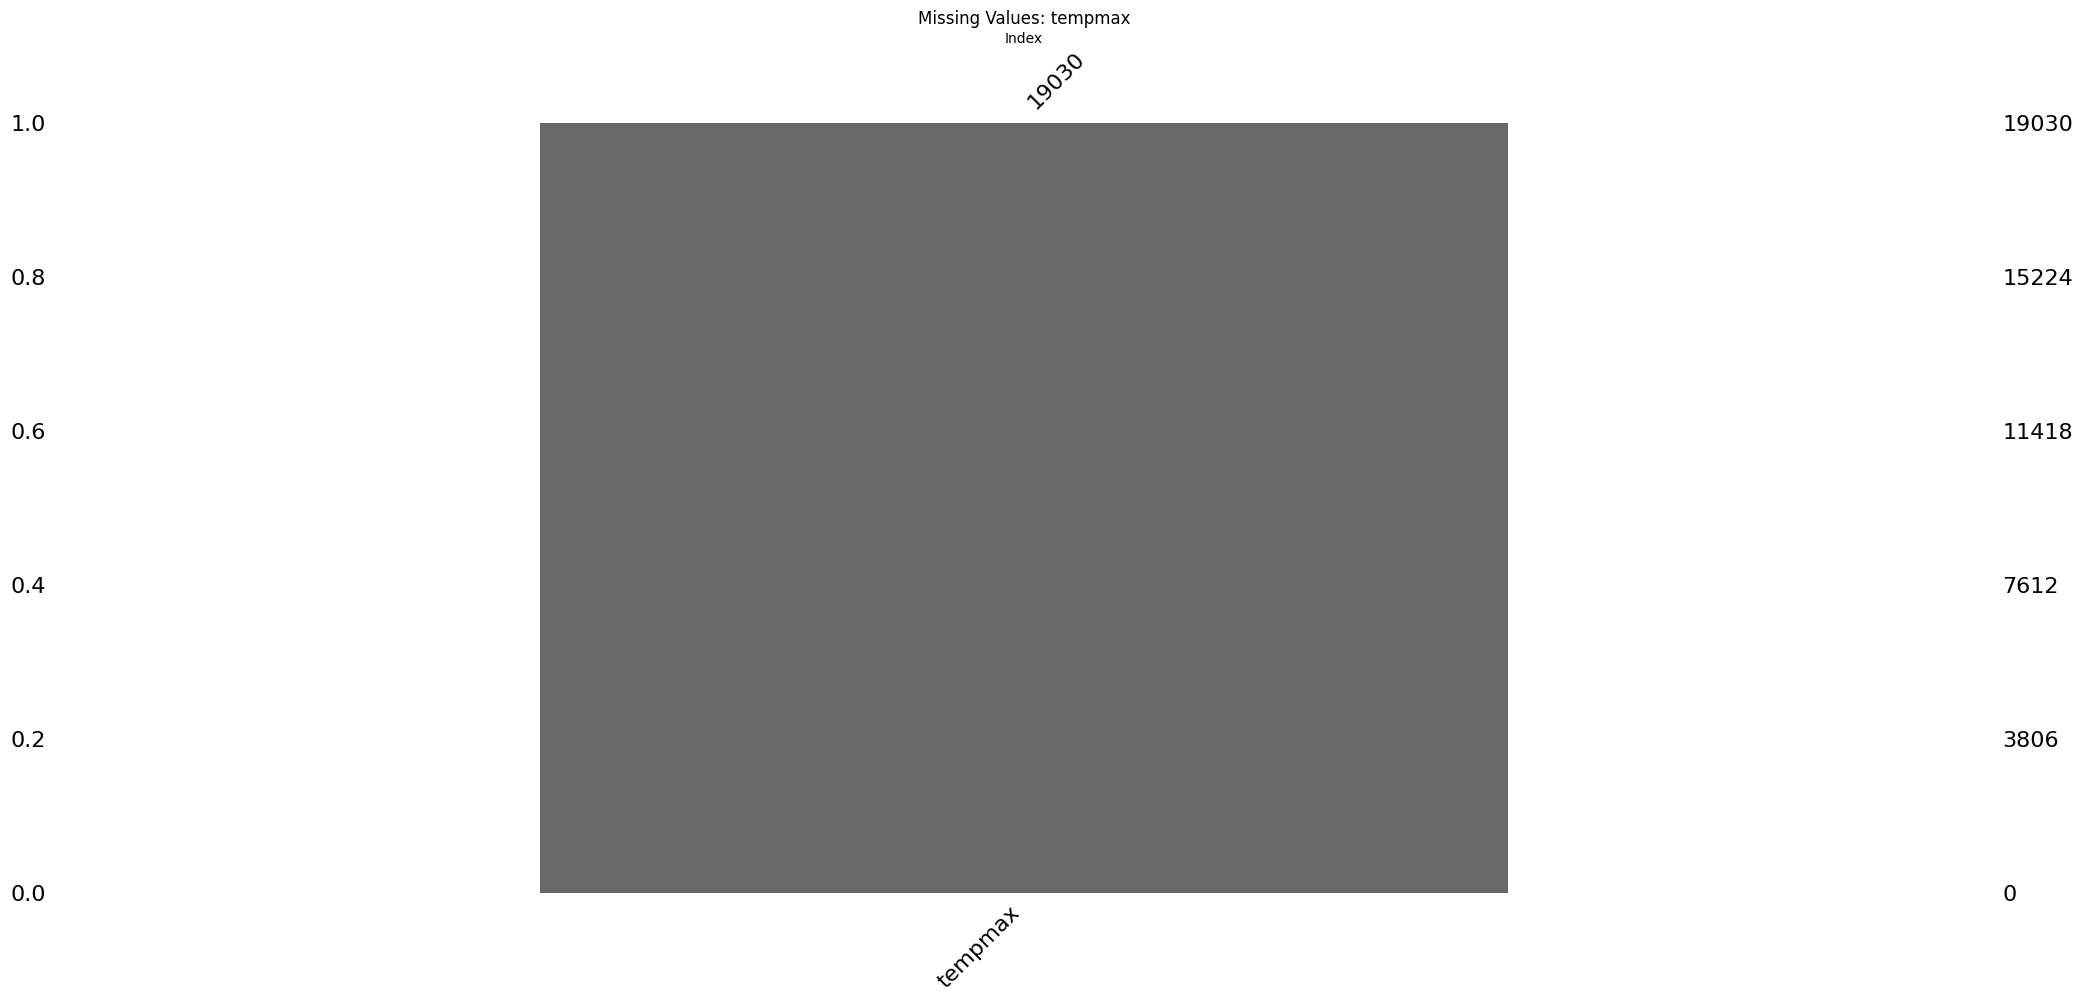

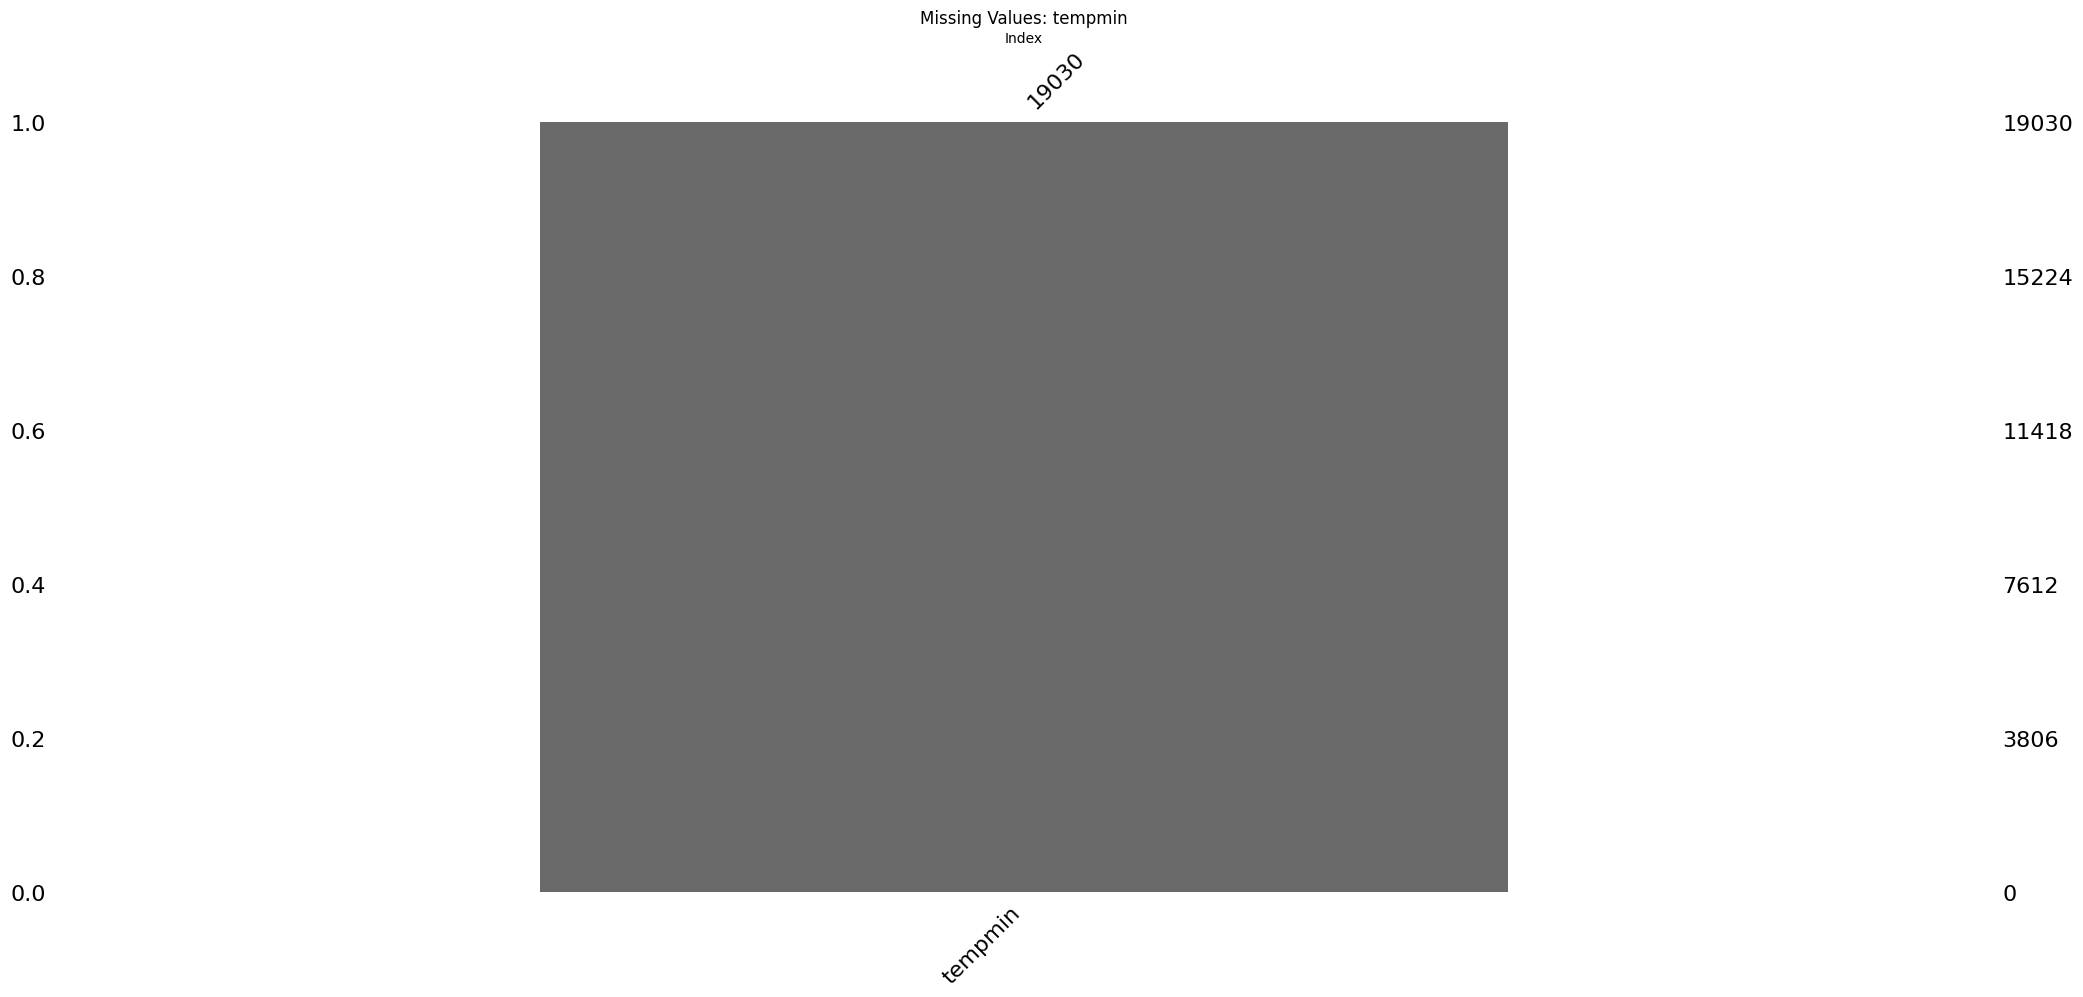

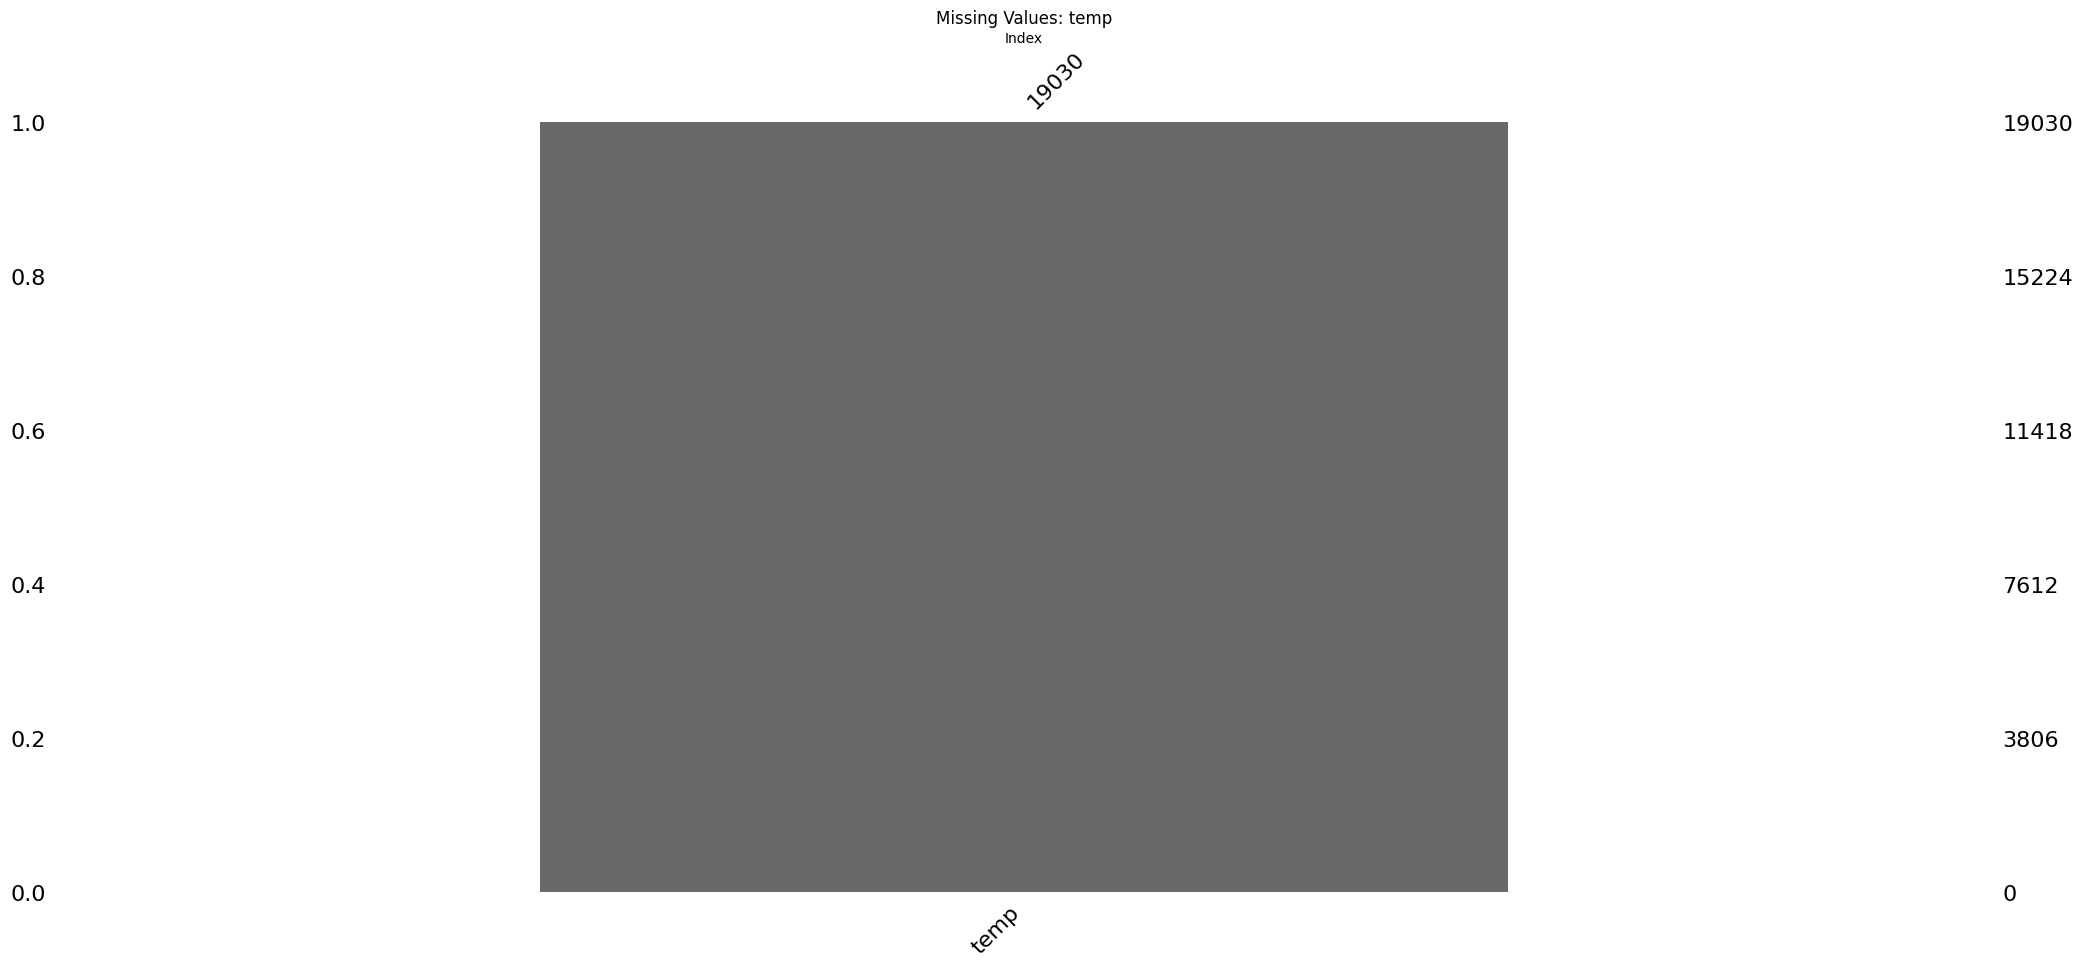

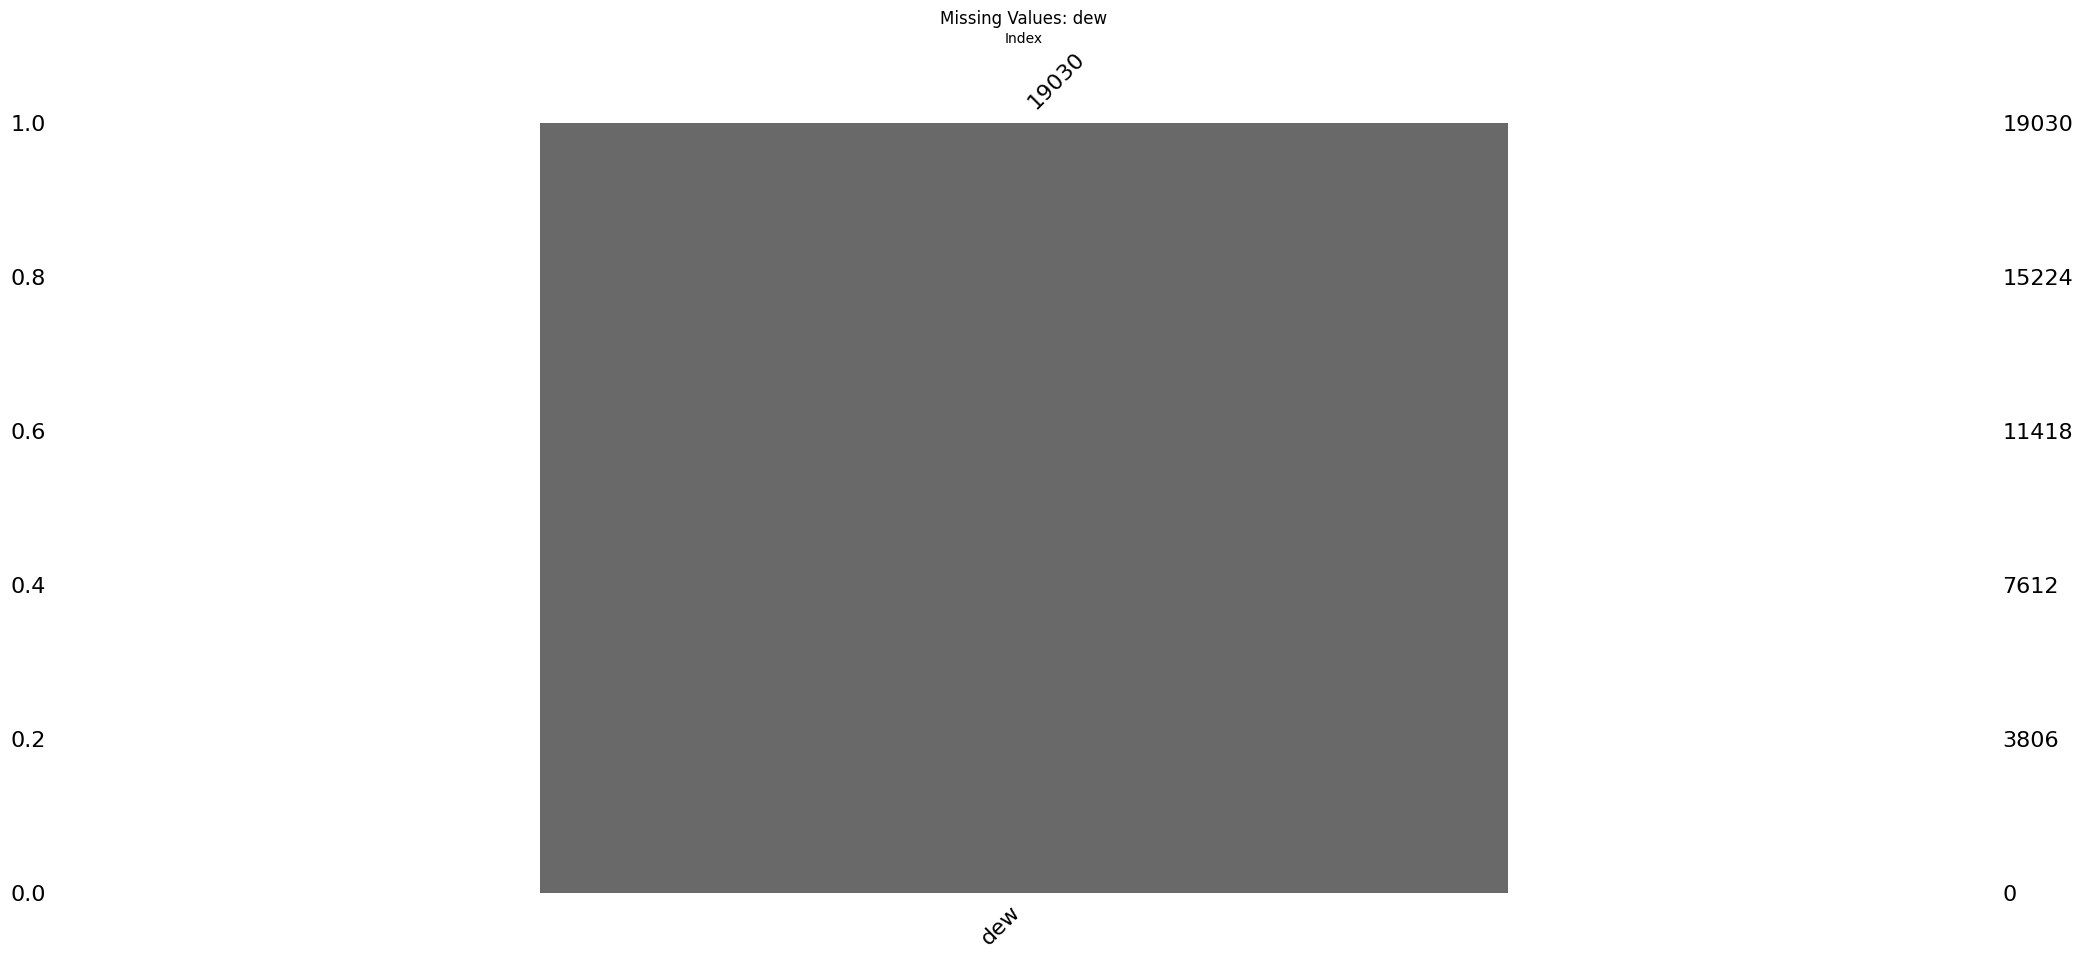

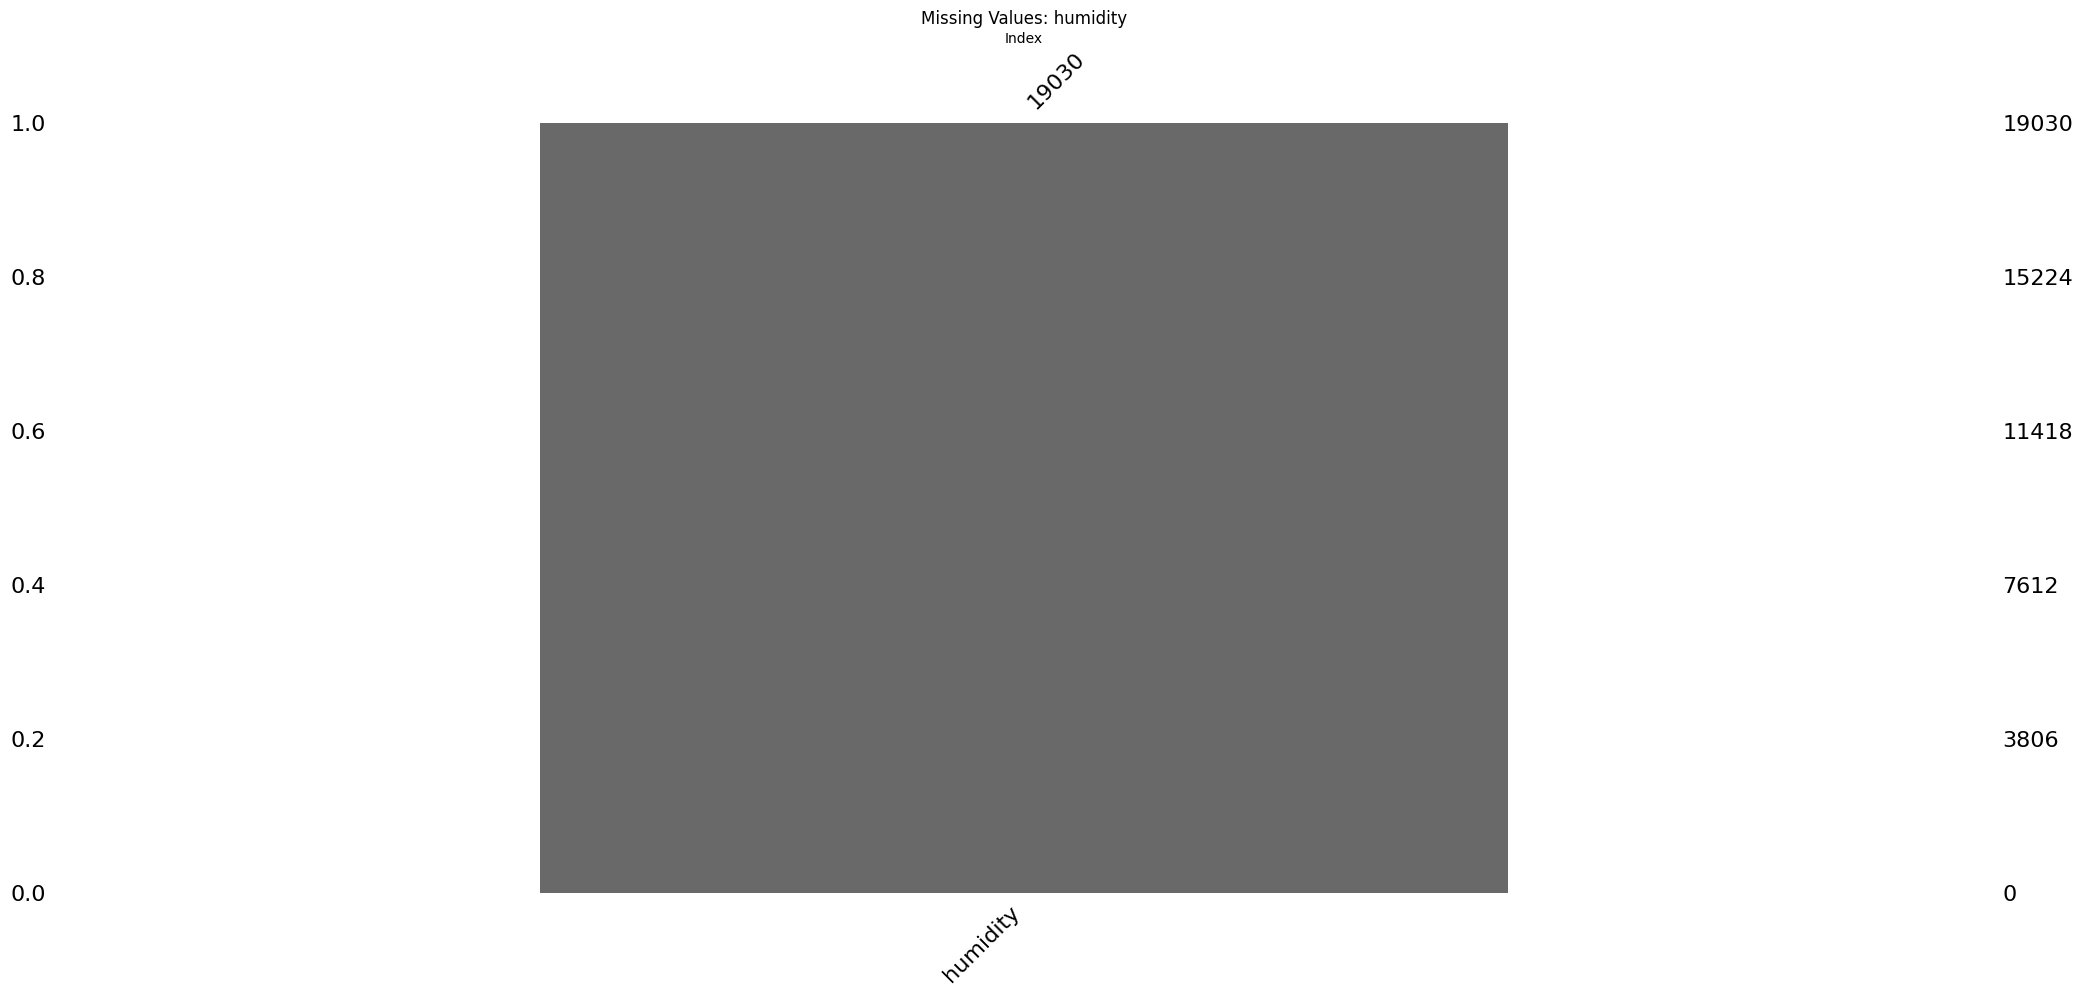

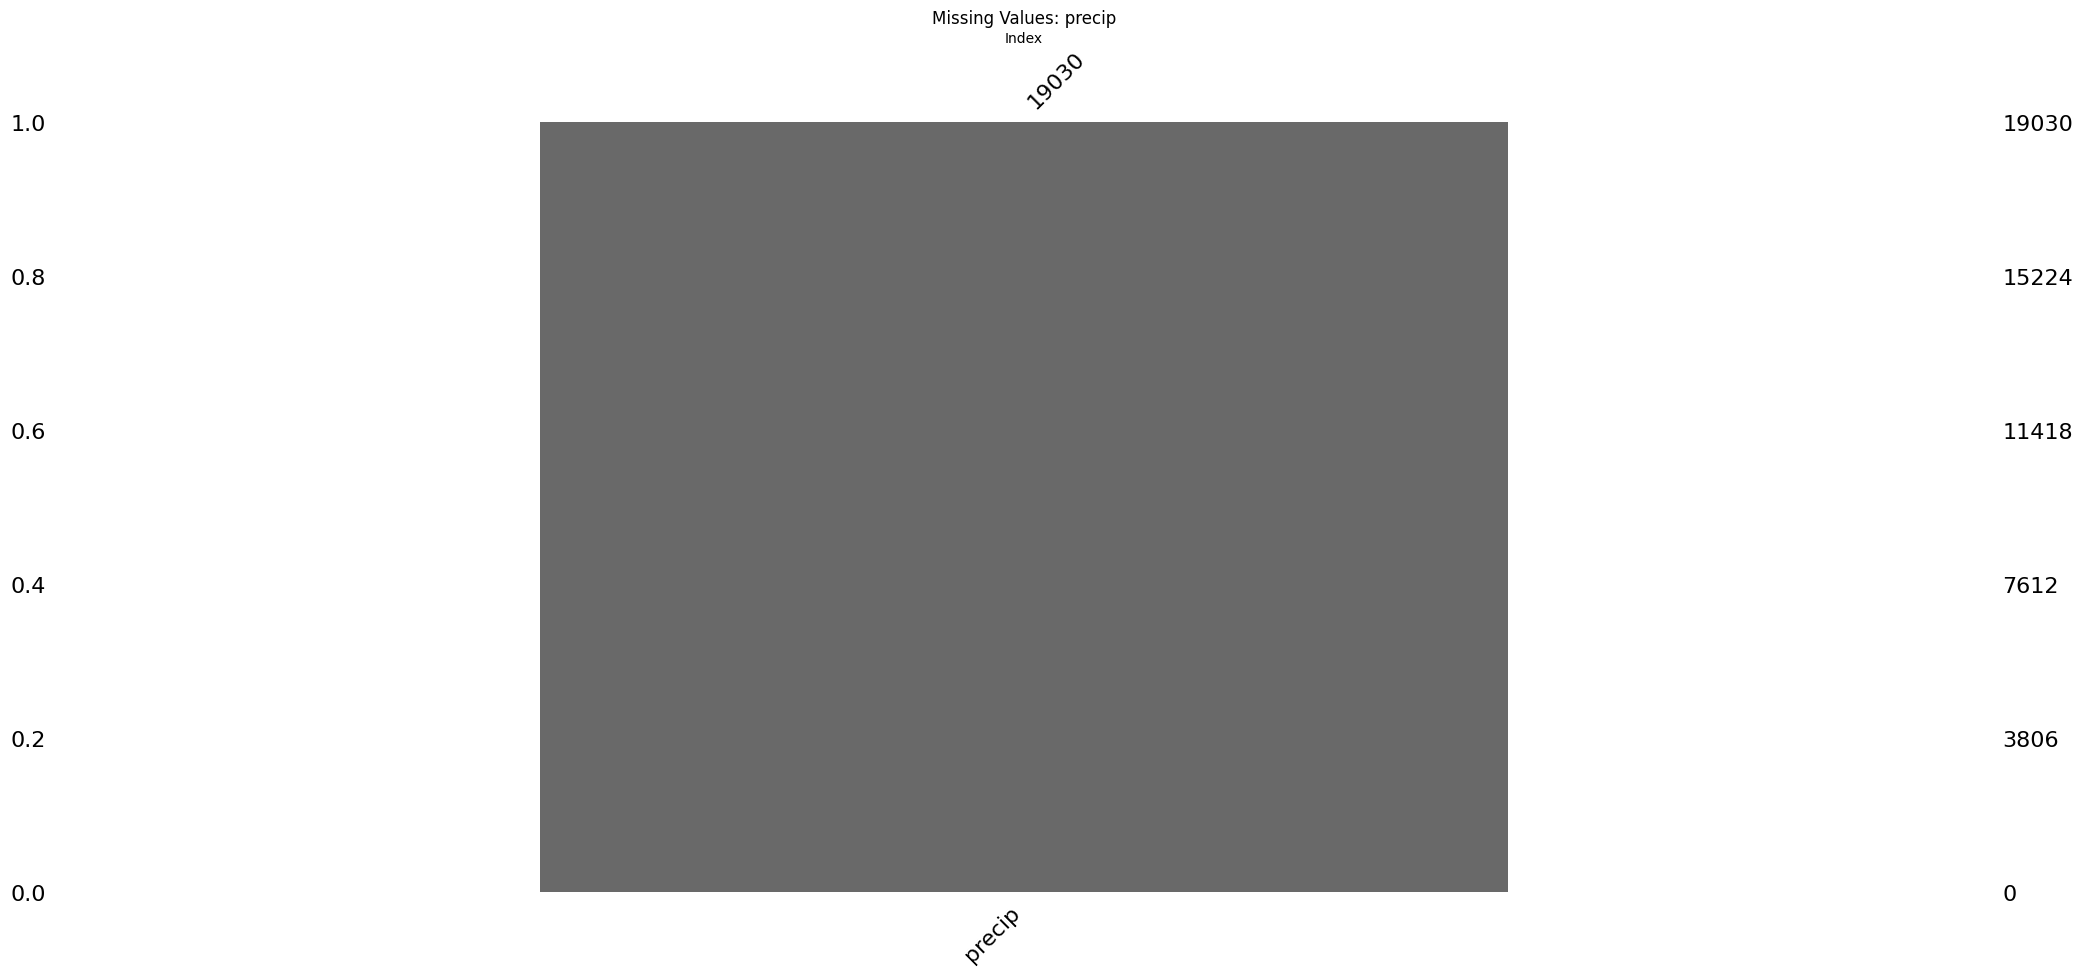

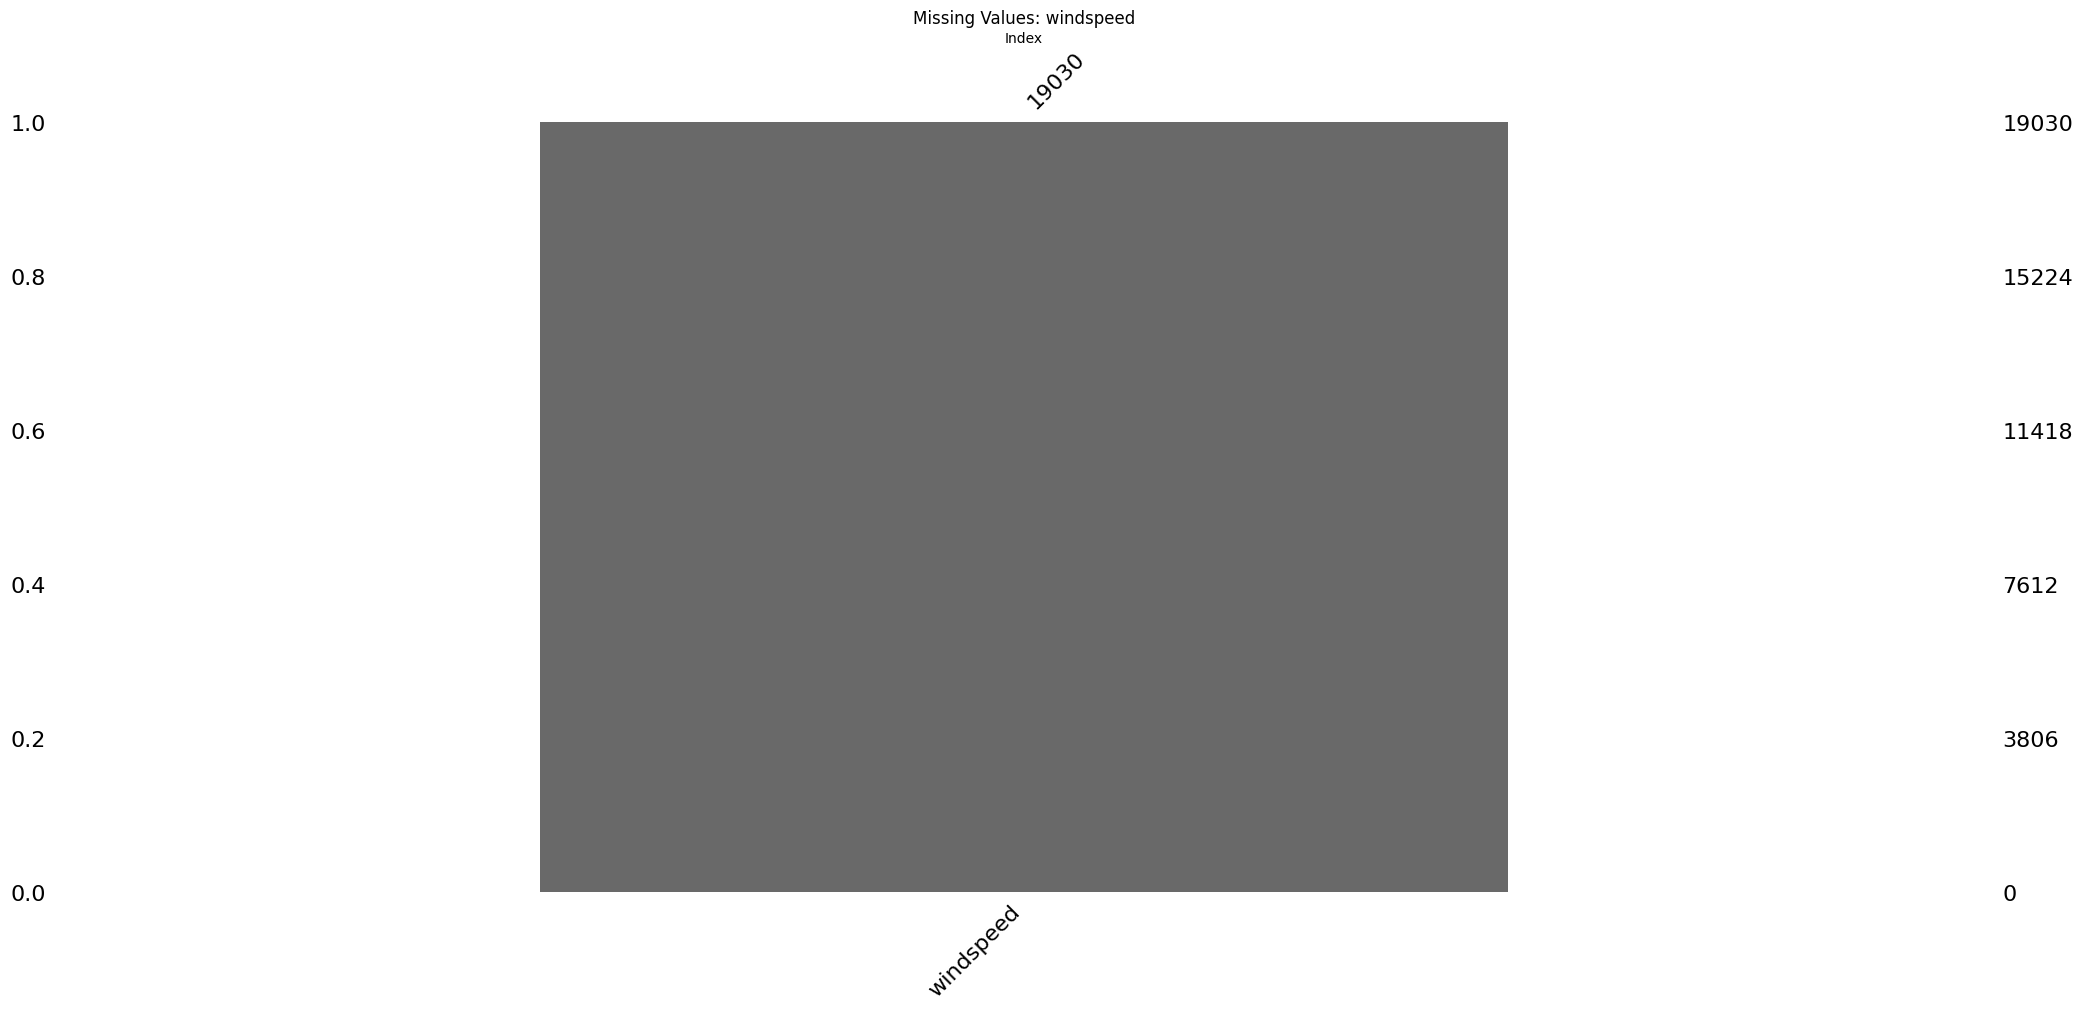

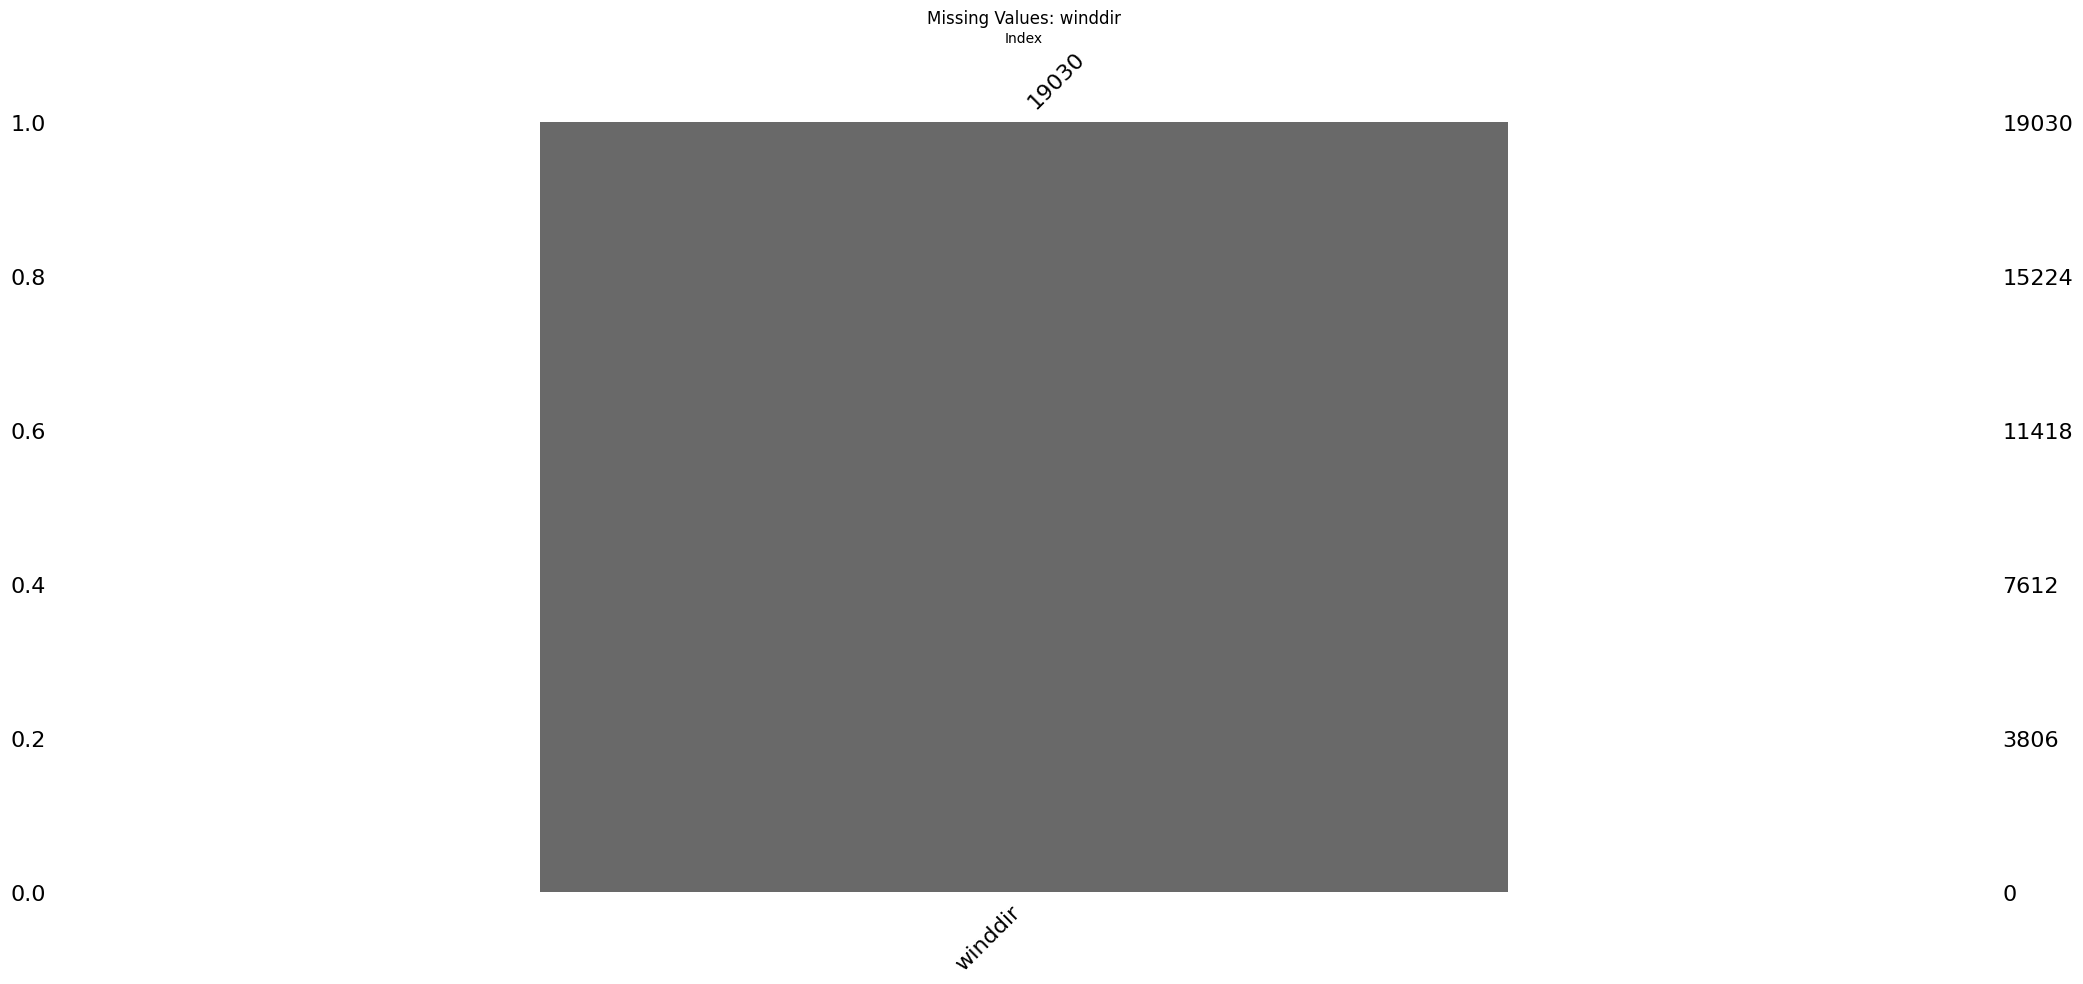

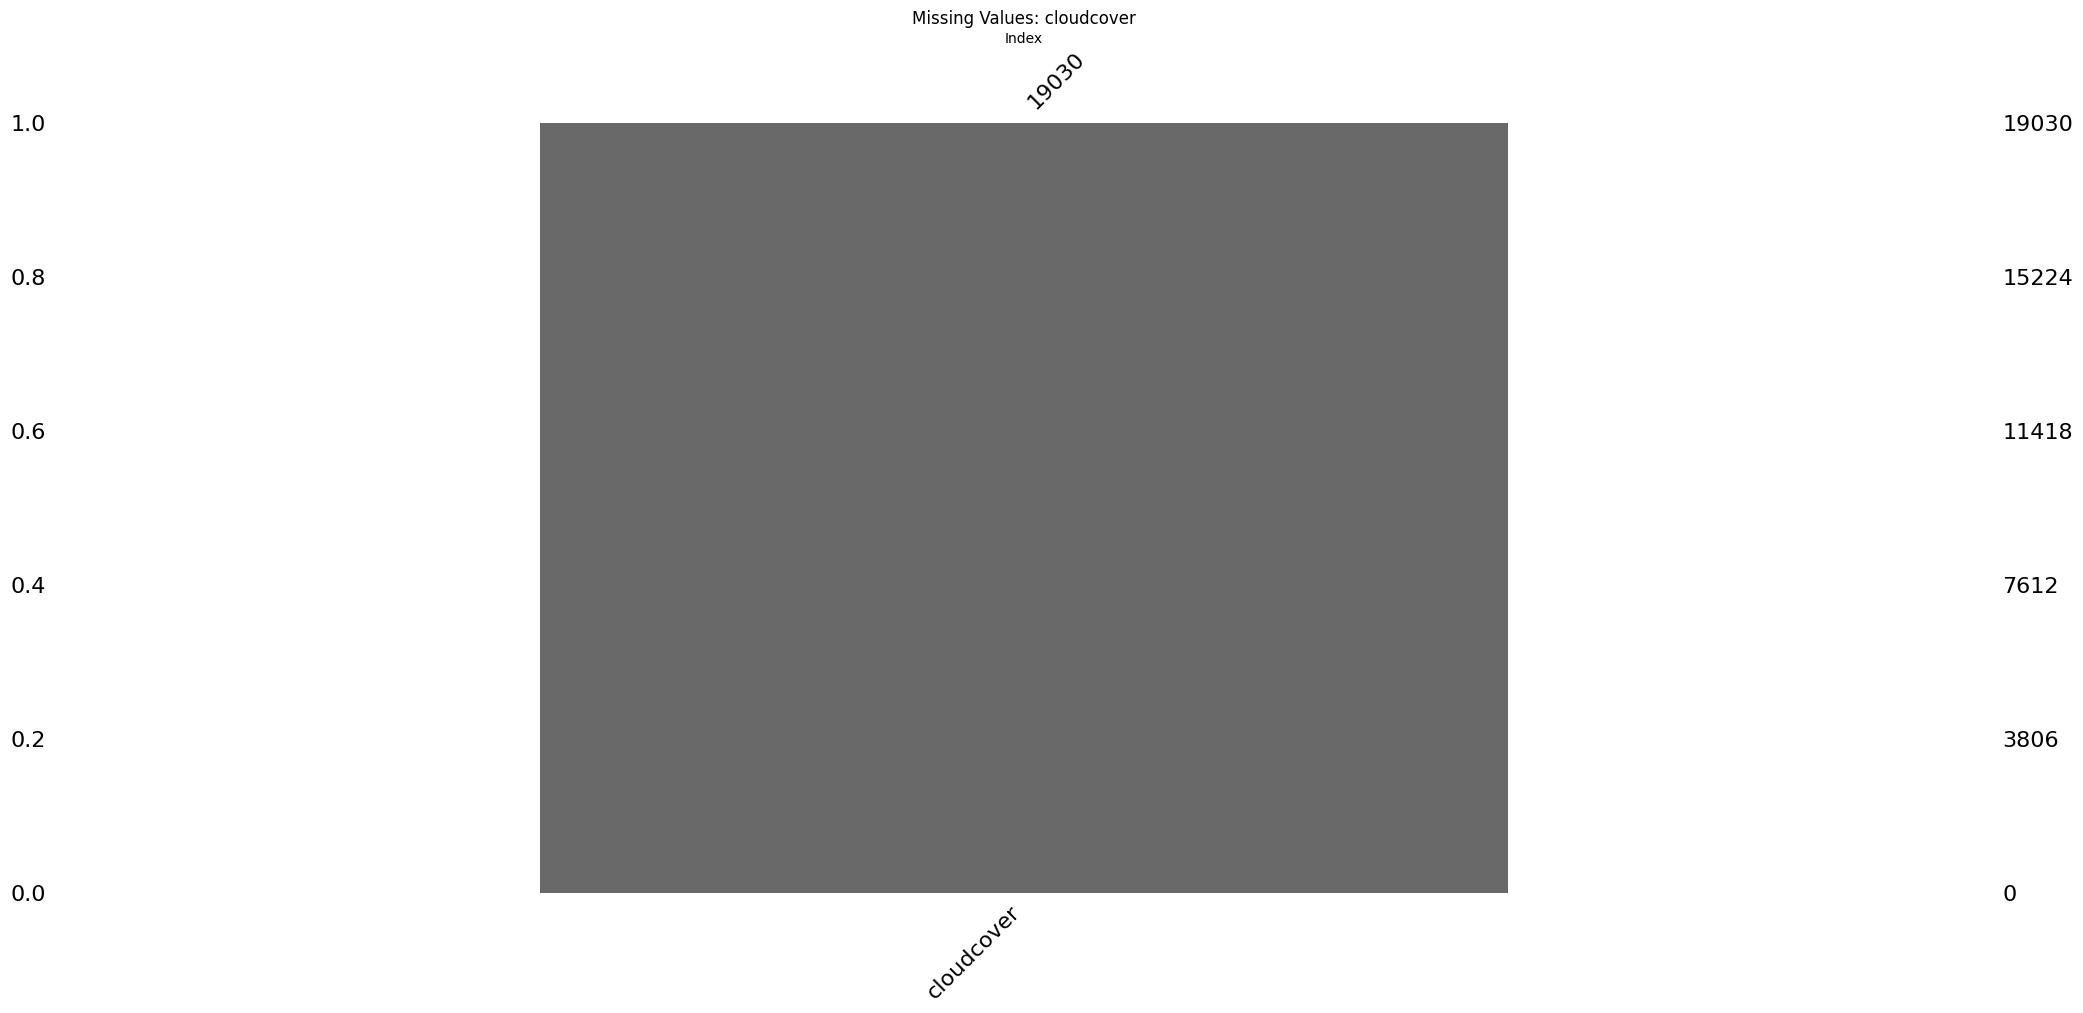

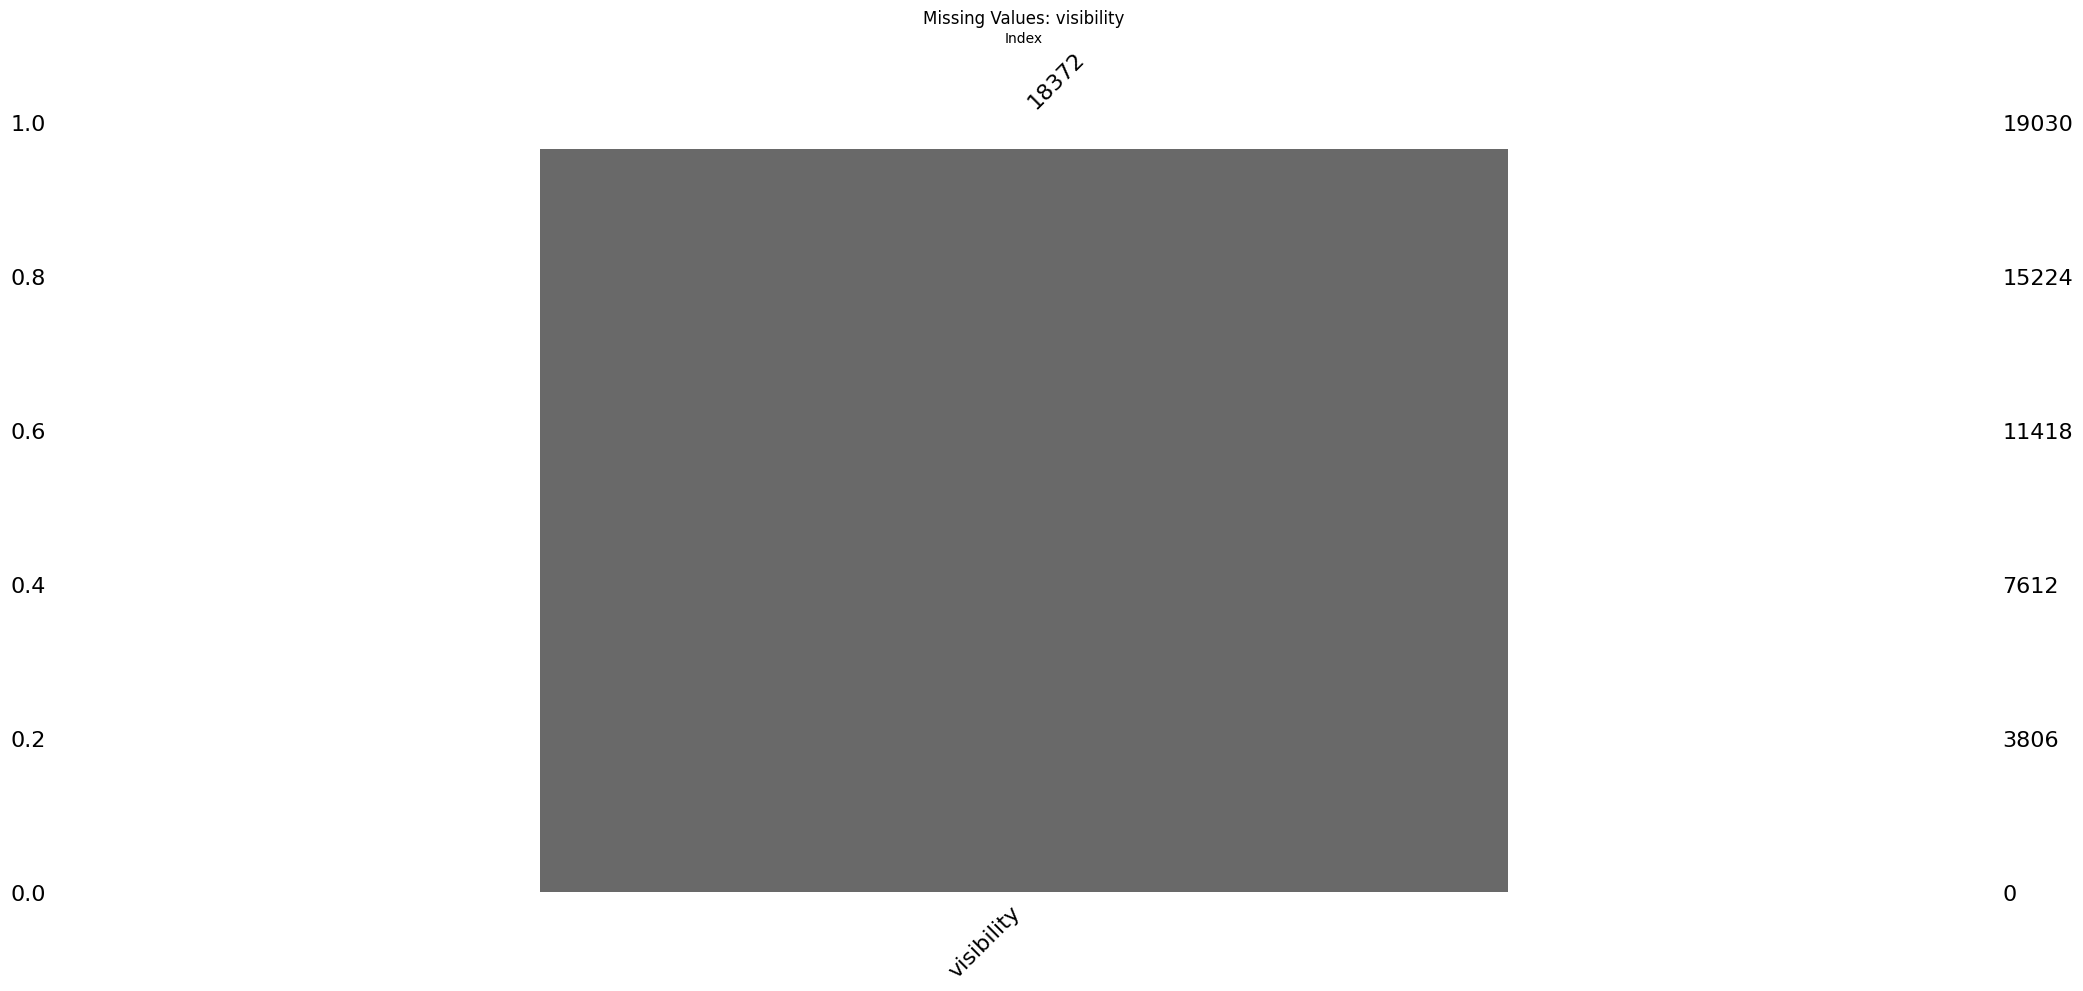

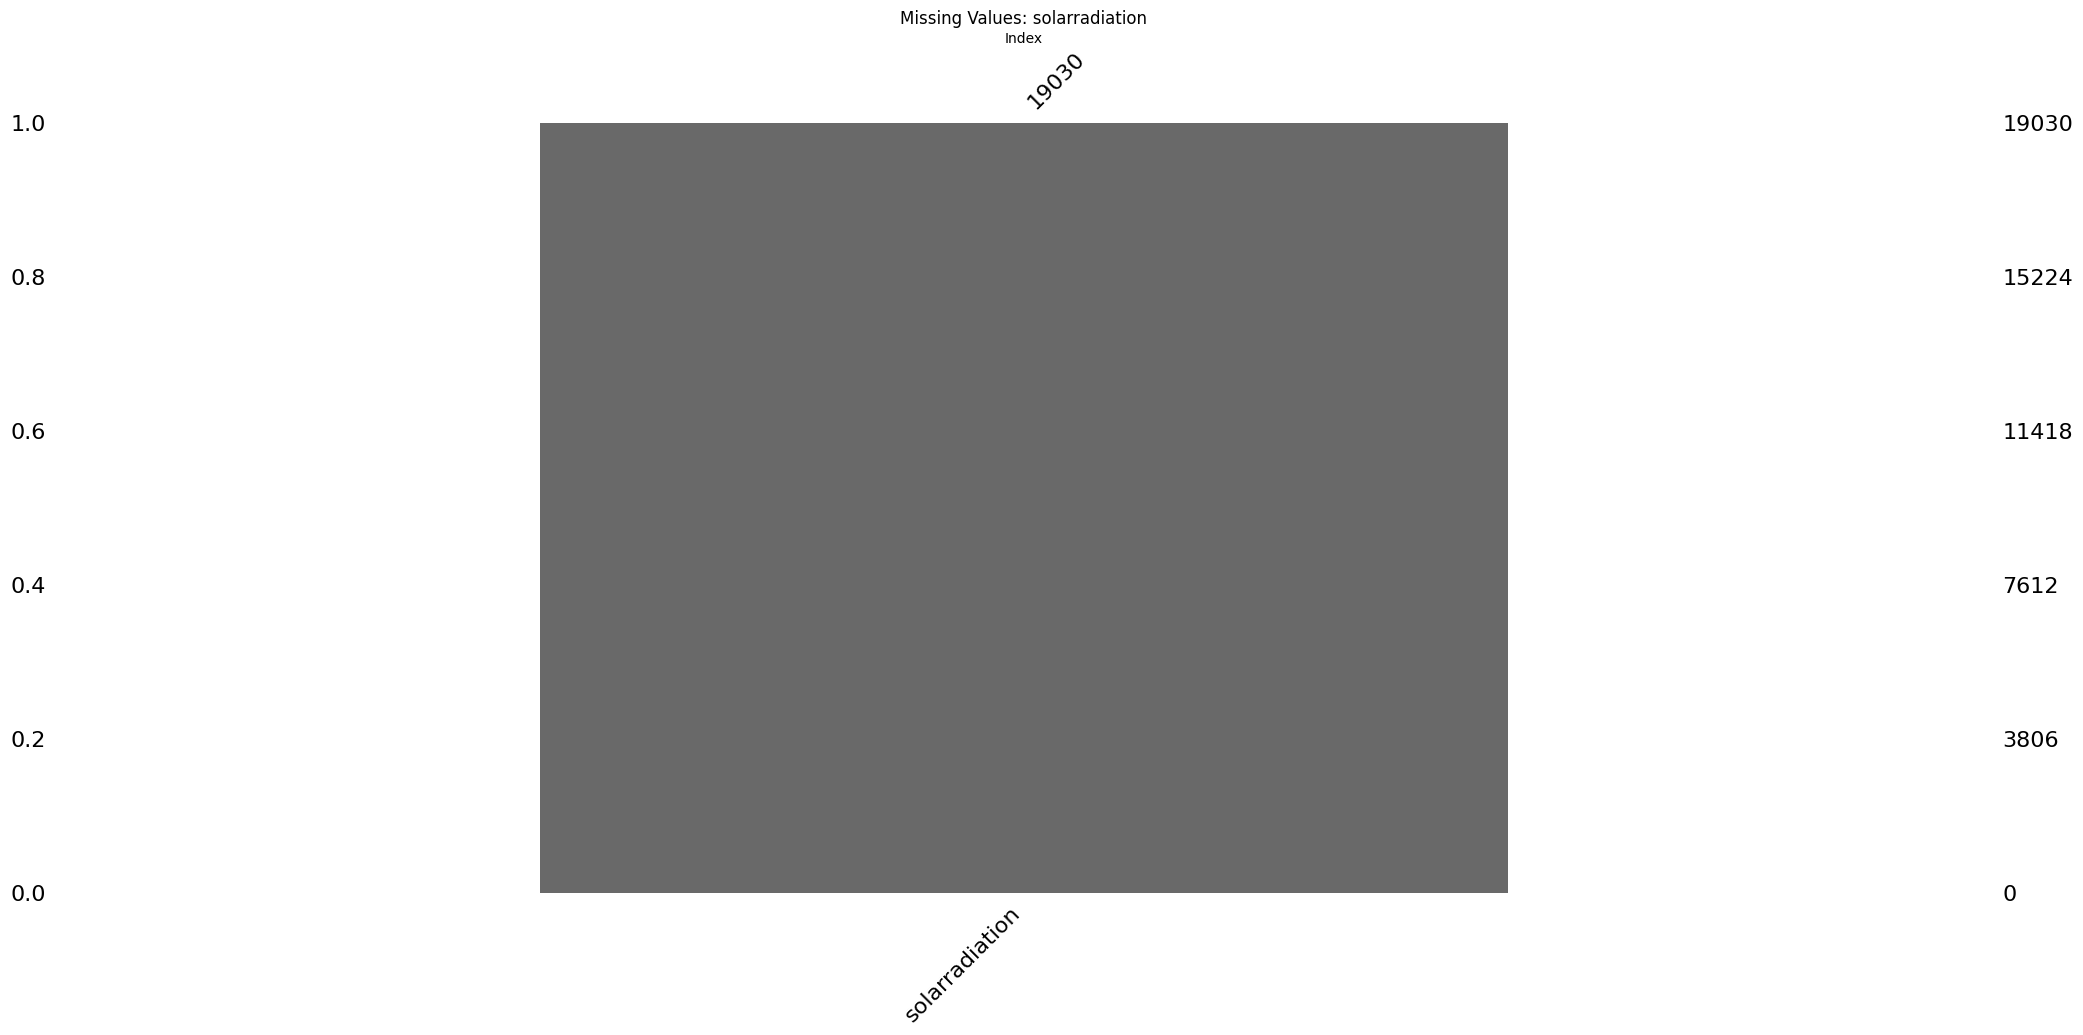

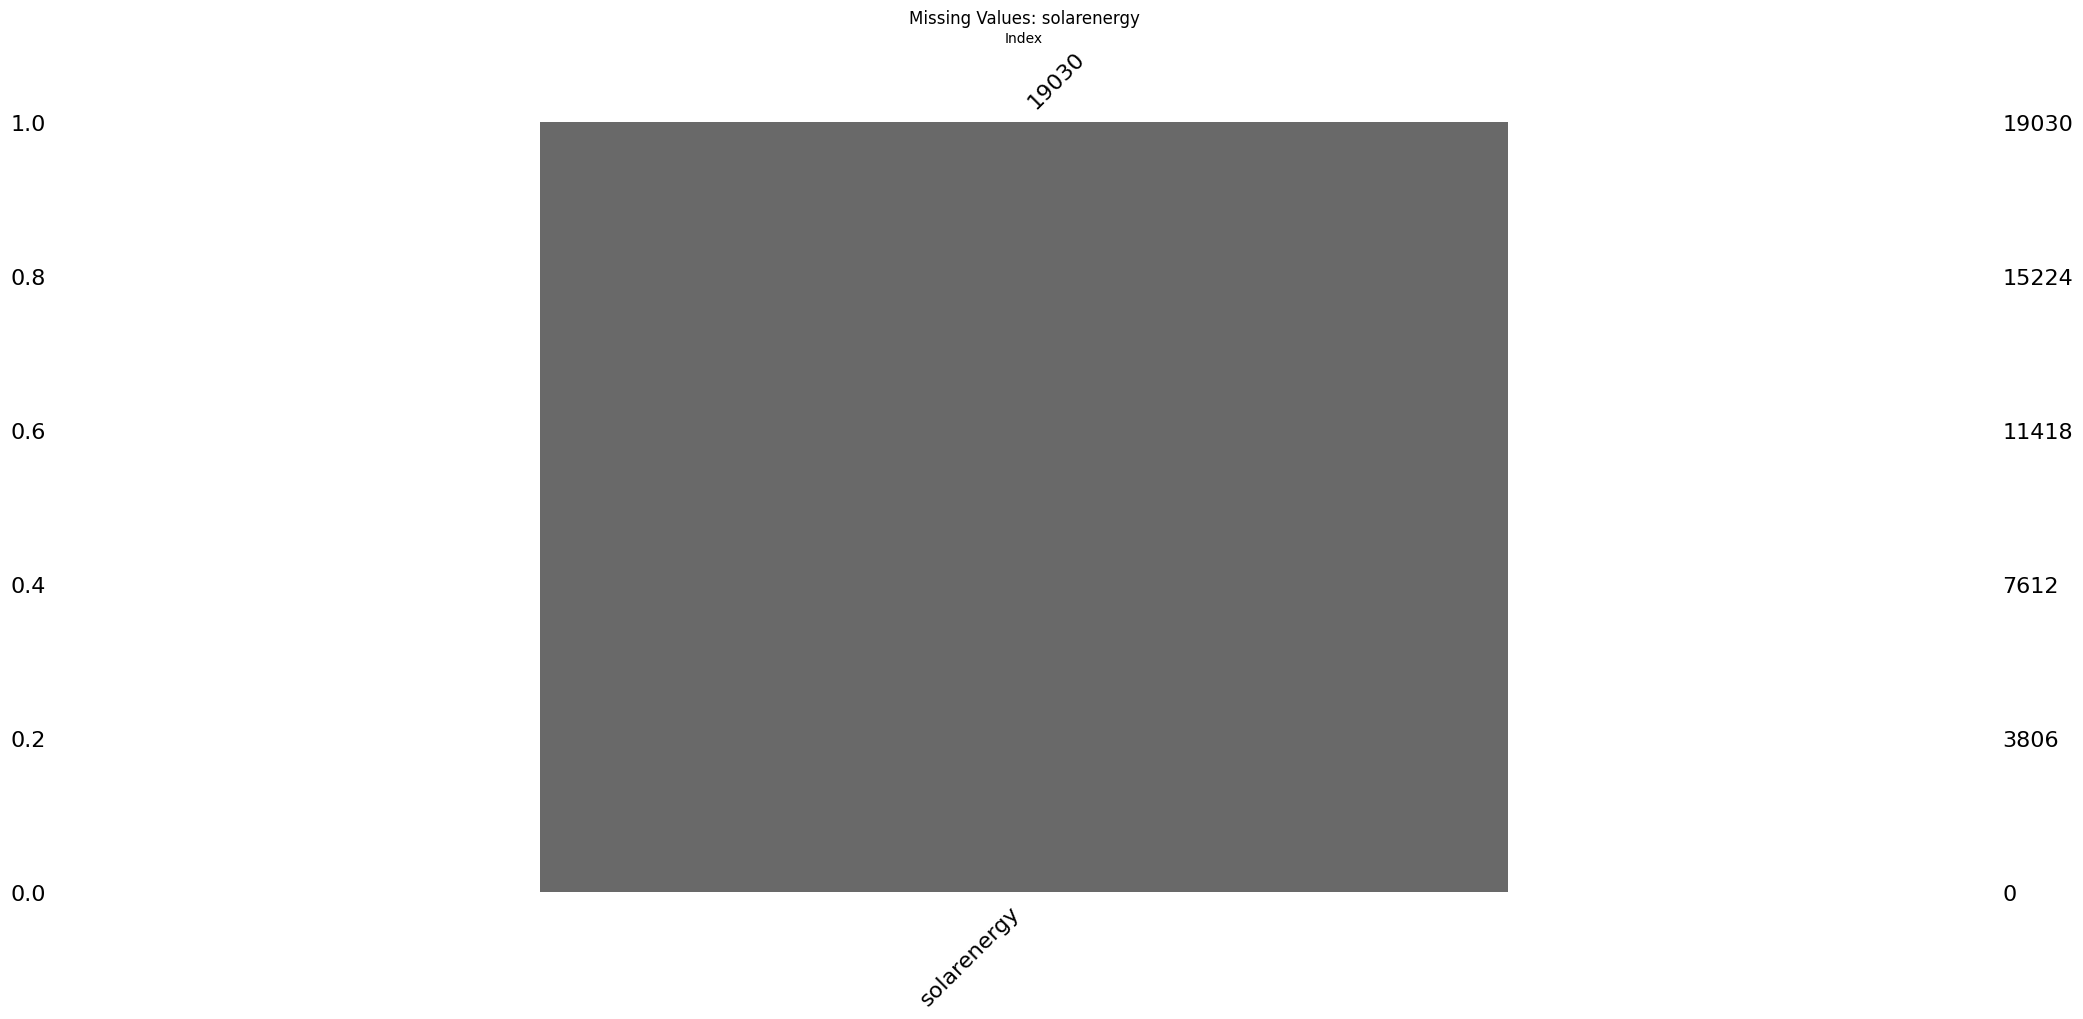

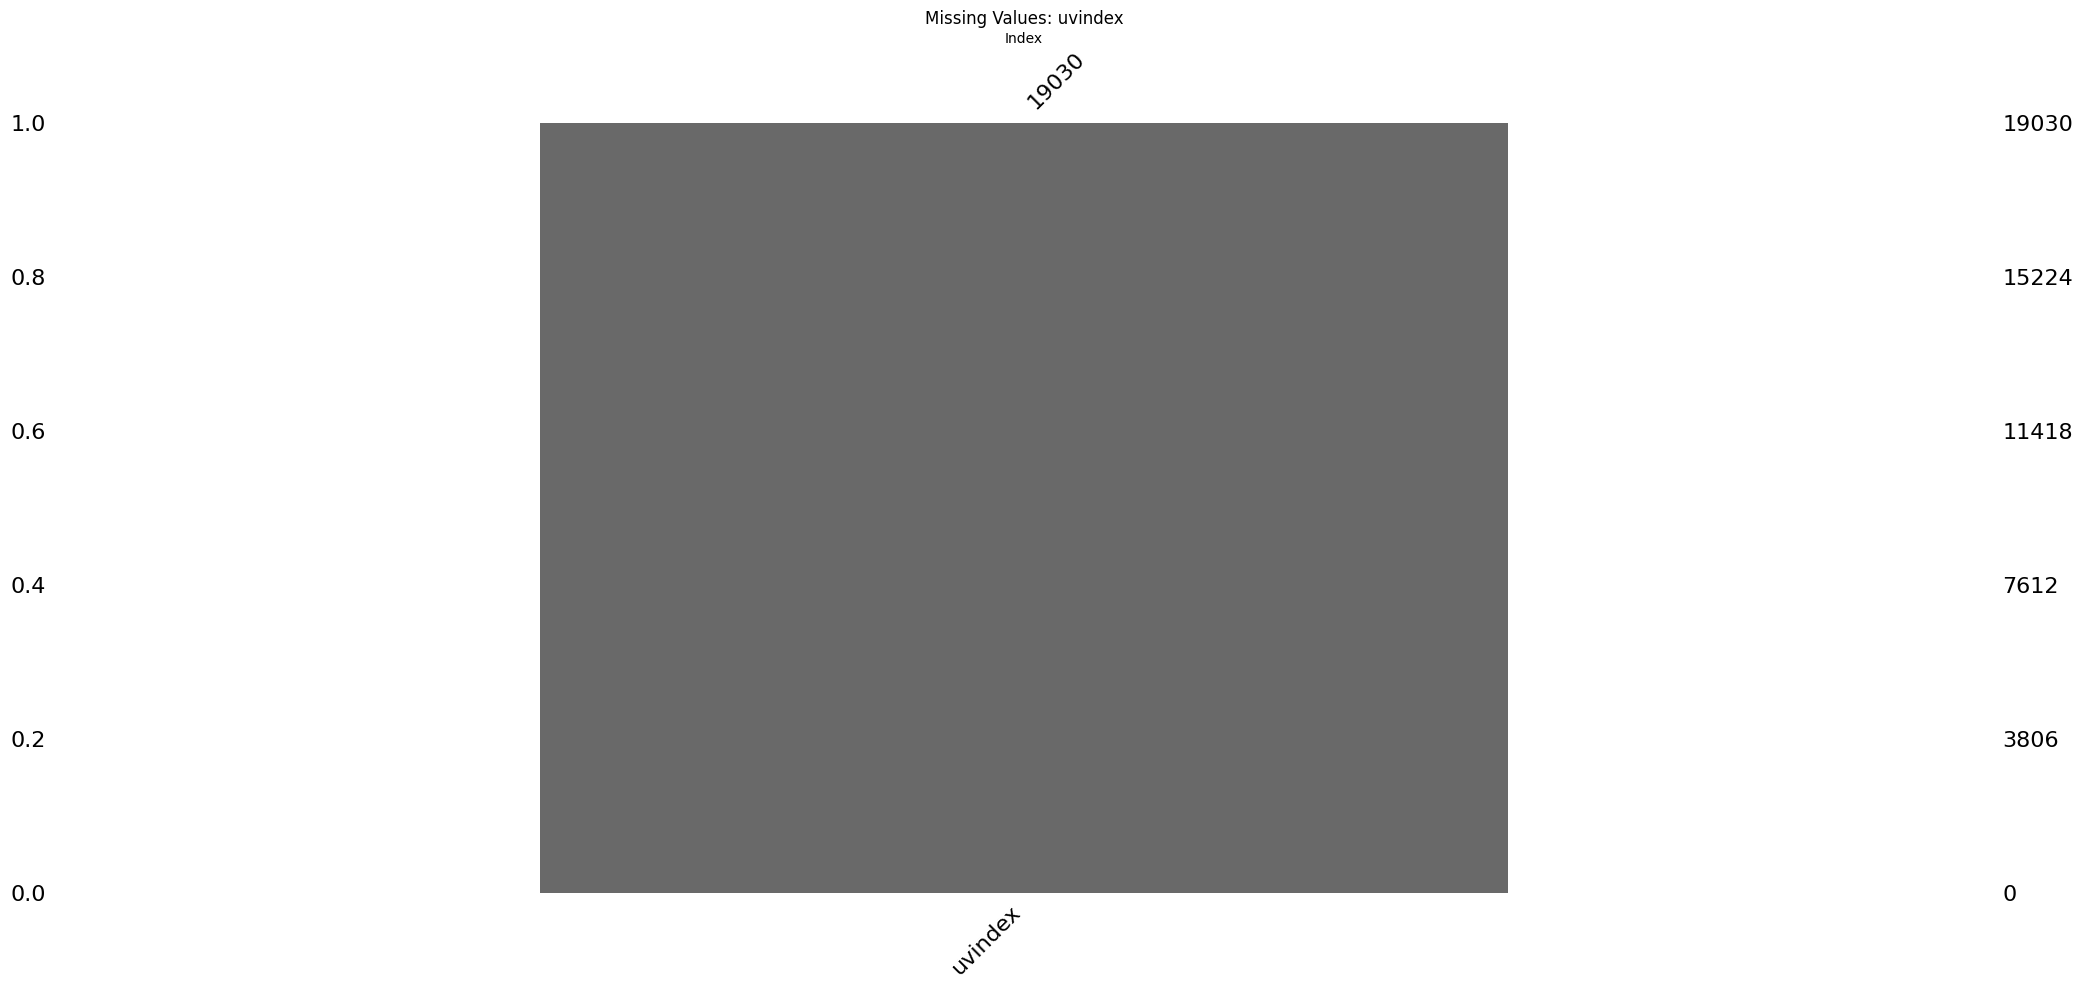

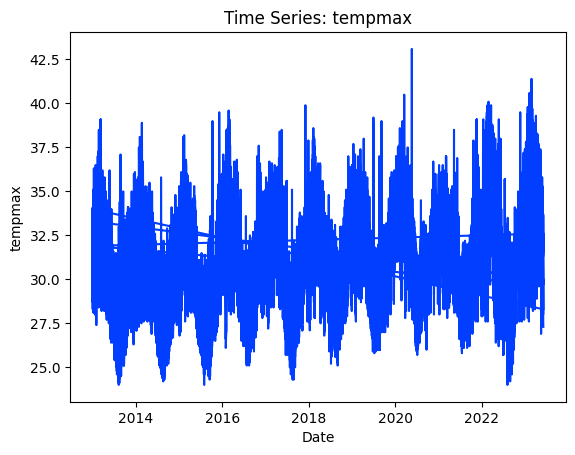

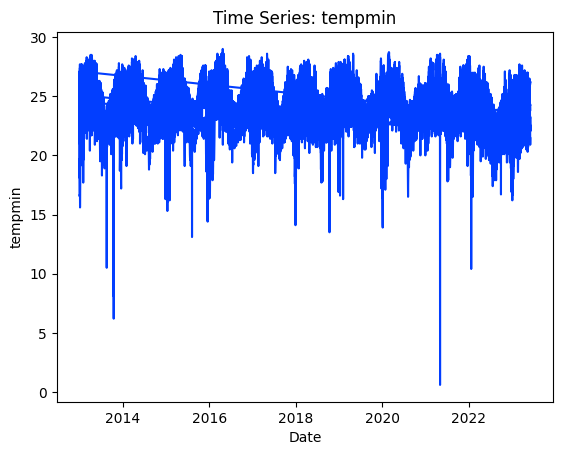

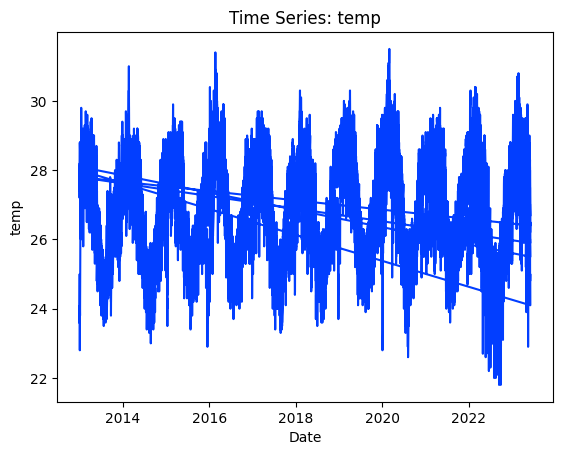

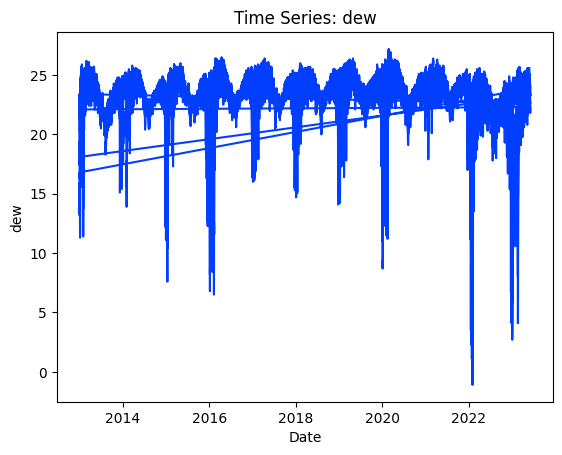

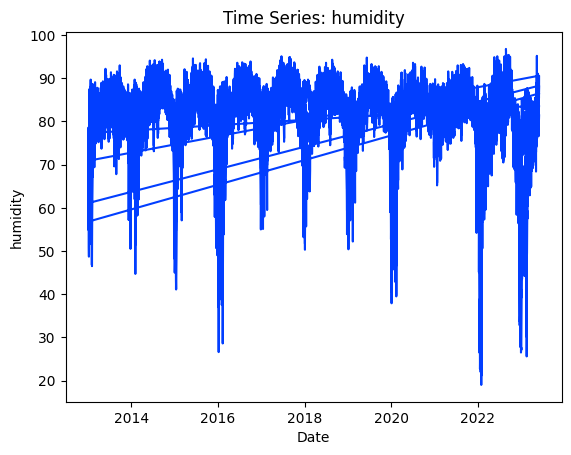

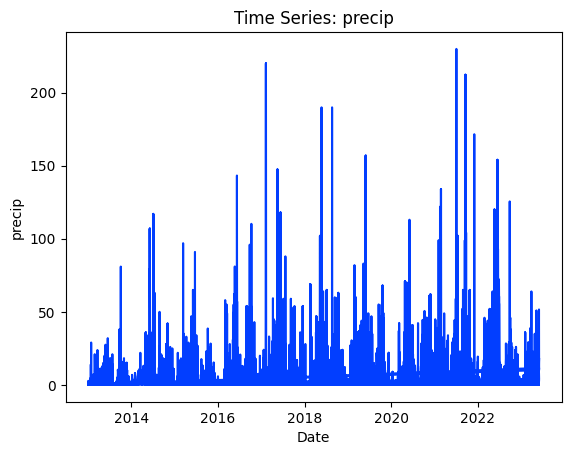

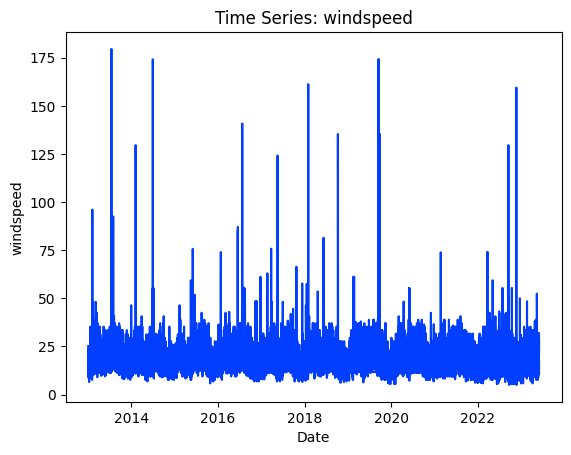

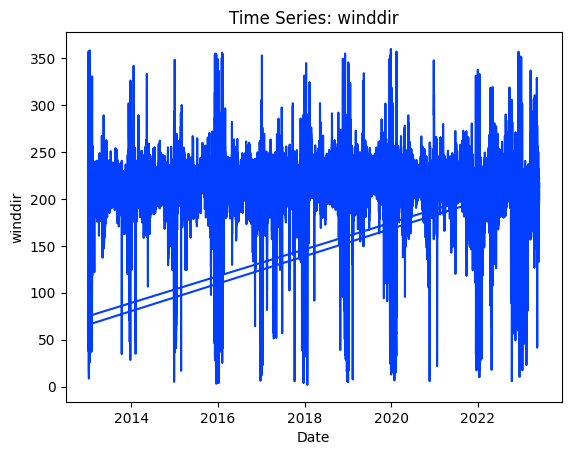

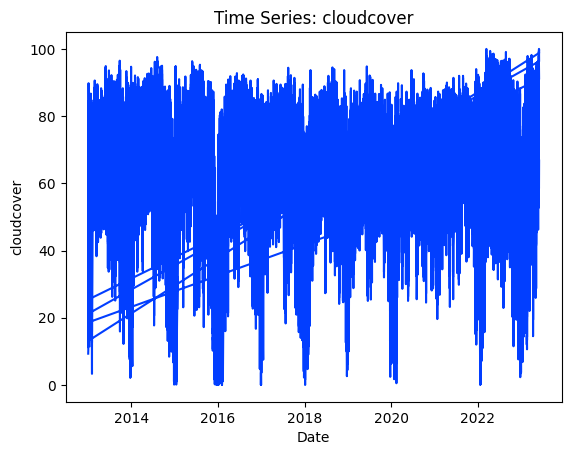

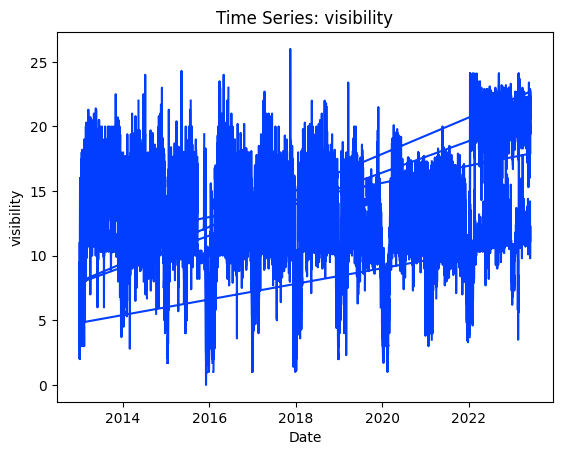

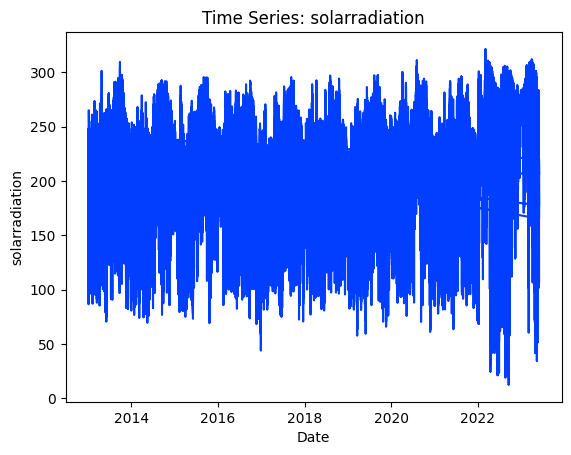

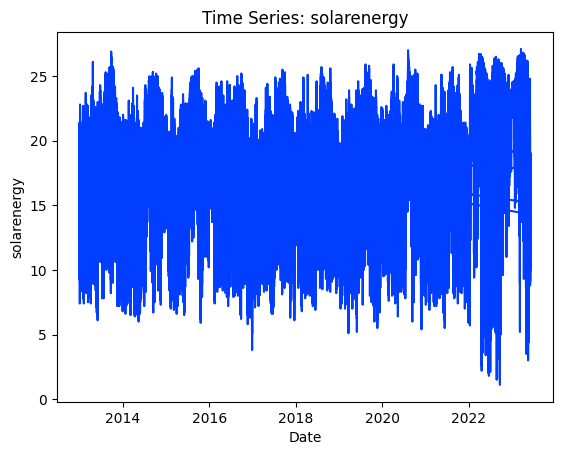

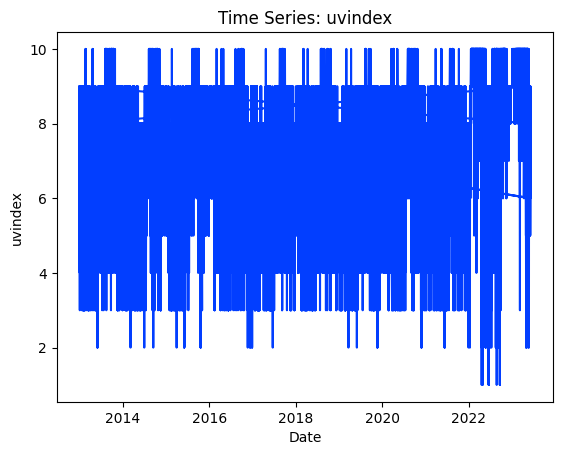

In [11]:
# Are there any gaps in this dataset?
# Visibility has the most amount of missing values.
# However, there are no large gaps in the dataset.

numerical_cols = weather_df.select_dtypes(include='number')

# Visualize missing values for each numerical variable
for col in numerical_cols.columns:
    plt.figure()
    msno.bar(weather_df[[col]])
    plt.title(f'Missing Values: {col}')
    plt.xlabel('Index')
    plt.ylabel('Count')

# Visualize gaps in the time series for each numerical variable
for col in numerical_cols.columns:
    plt.figure()
    plt.plot(weather_df['Date'], weather_df[col])
    plt.title(f'Time Series: {col}')
    plt.xlabel('Date')
    plt.ylabel(col)

# Show the plots
plt.show()


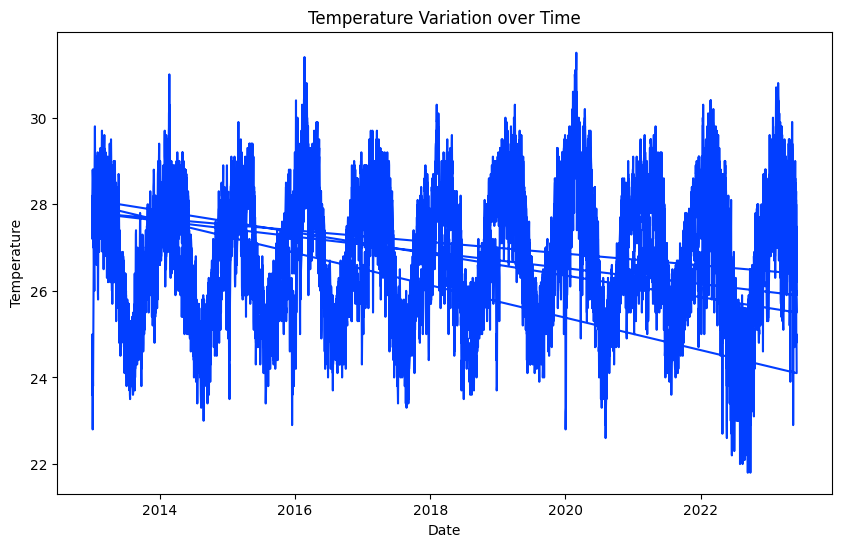

In [13]:
# How has Temperature varied across time?

# Convert the date column to datetime format
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y-%m-%d')

# Set the date column as the index
weather_df.set_index('Date', inplace=True)


# Plot the variation of temperature over time
plt.figure(figsize=(10, 6))
plt.plot(weather_df.index, weather_df['temp'])
plt.title('Temperature Variation over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


C:\Users\chimi\AppData\Local\Temp\ipykernel_5732\5958141.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_df = weather_df.resample('D').mean()  # Resample to daily frequency and fill missing values with mean or other appropriate method


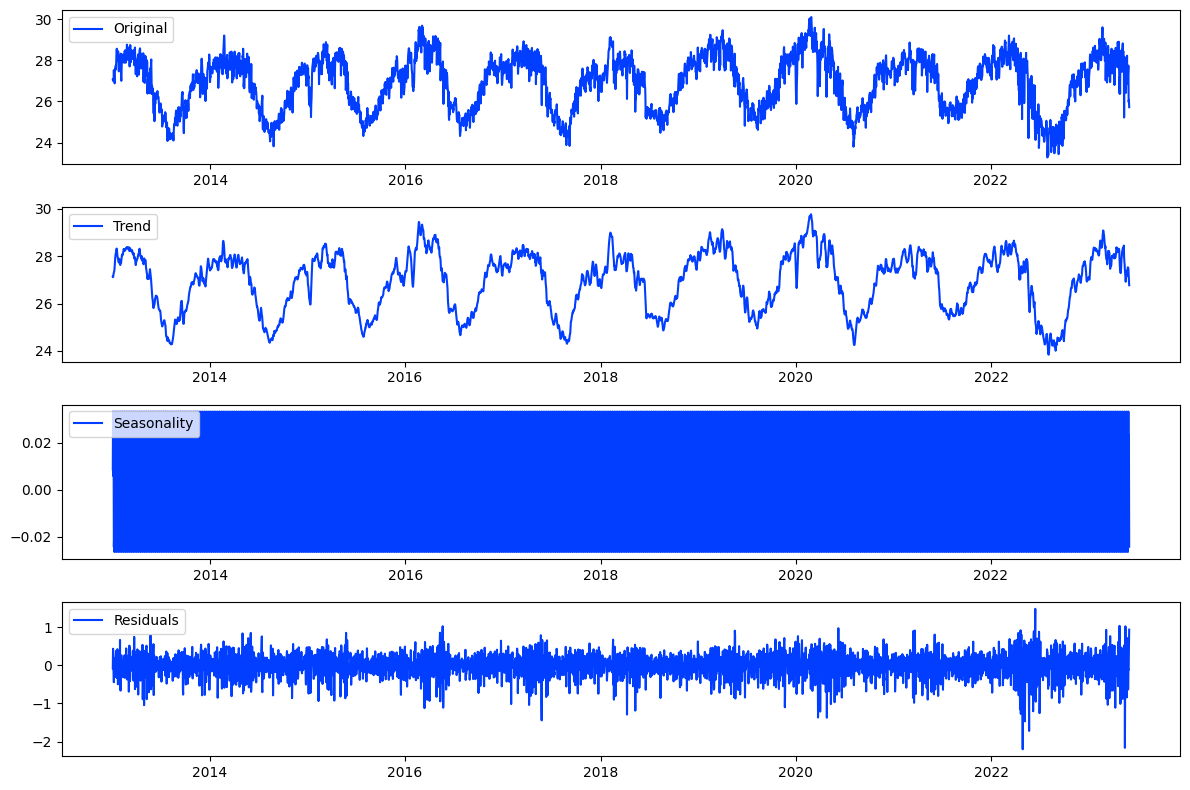

In [59]:
# Are there seasonal variation or pattern in temperature?
weather_df = weather_df.resample('D').mean()  # Resample to daily frequency and fill missing values with mean or other appropriate method

# Perform seasonal decomposition
decomposition = seasonal_decompose(weather_df['temp'], model='additive')

# Access the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(weather_df['temp'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [15]:
# Are there any seasonal pattern or variations for maximum and minimum temperatuees?
weather_df = weather_df.reset_index()

In [17]:
# Extract month and year from the 'Date column'
weather_df['Month'] = weather_df['Date'].dt.month
weather_df['Year'] = weather_df['Date'].dt.year

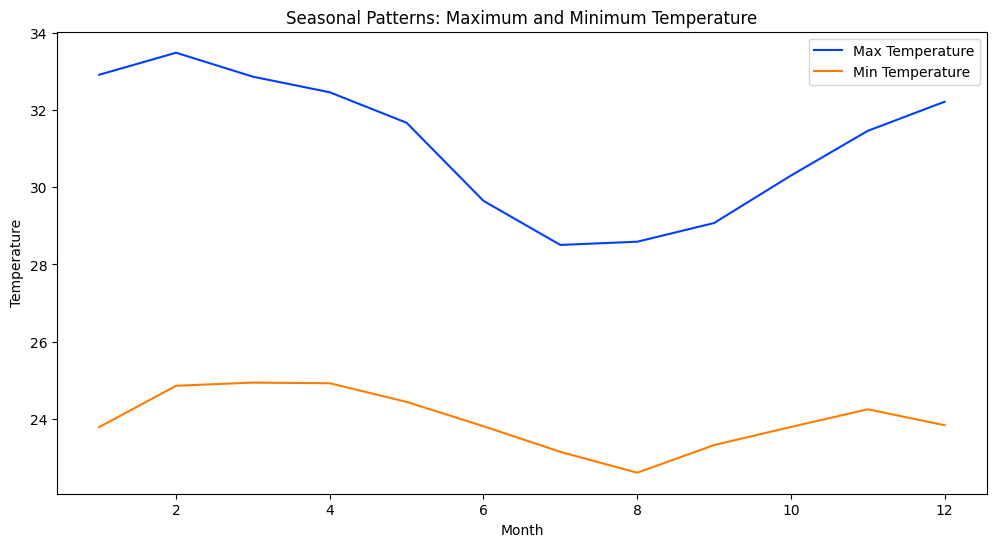

In [18]:
# Are there any seasonal variations in minimum and maximum temperatures?
# Maximum temperatue is going up.
seasonal_averages = weather_df.groupby(['Month']).agg({'tempmax': 'mean', 'tempmin': 'mean'}).reset_index()

# Plot the seasonal patterns of tempmax and tempmin
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_averages, x='Month', y='tempmax', label='Max Temperature')
sns.lineplot(data=seasonal_averages, x='Month', y='tempmin', label='Min Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Seasonal Patterns: Maximum and Minimum Temperature')
plt.legend()
plt.show()


In [20]:
# Drop the month and year columns
weather_df.drop(columns=['Month','Year'],inplace=True)

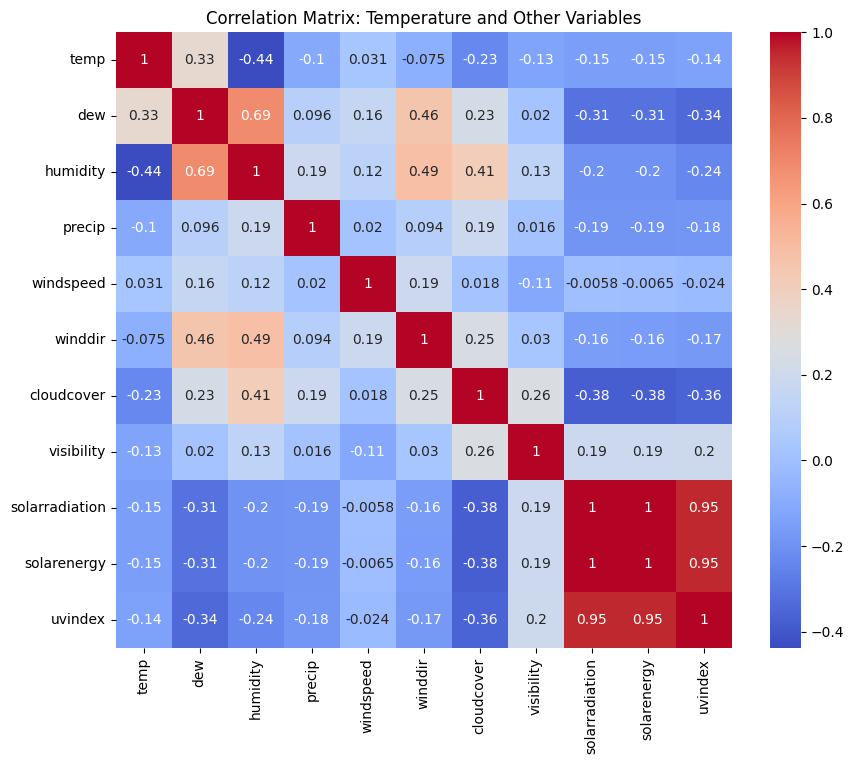

In [21]:
# What is the correleation between temperature and other variables?
# Temperature share a moderate correleation with humidity.
#  Calculate the correleation matrix
correlation_matrix = weather_df[['temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex']].corr()

# Visualize the correleation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix: Temperature and Other Variables')
plt.show()

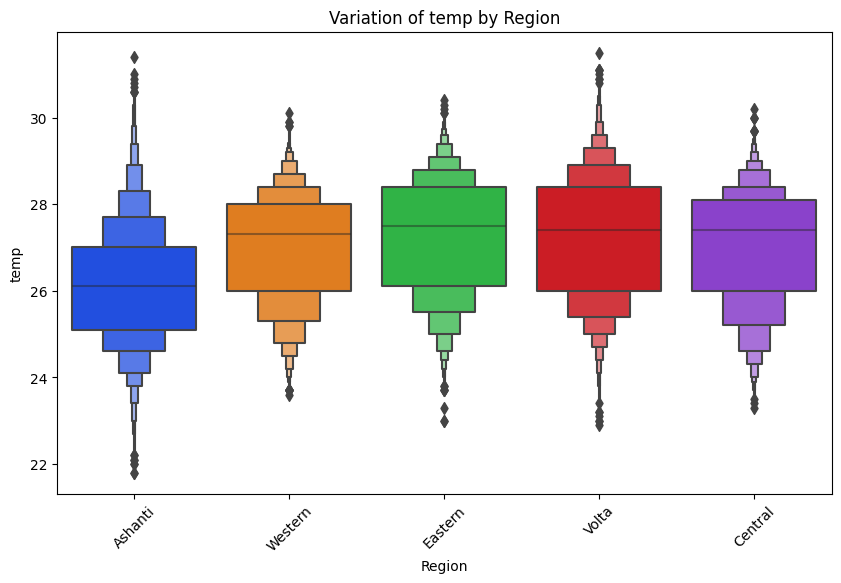

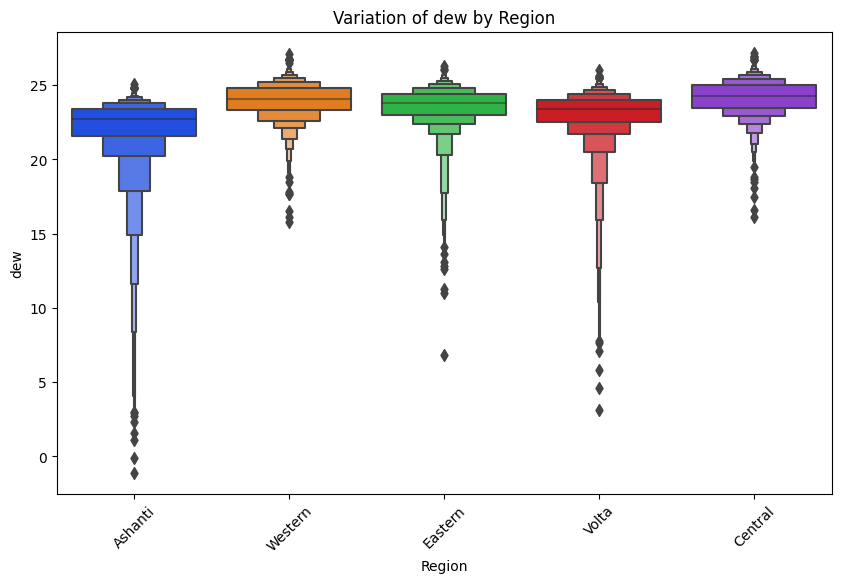

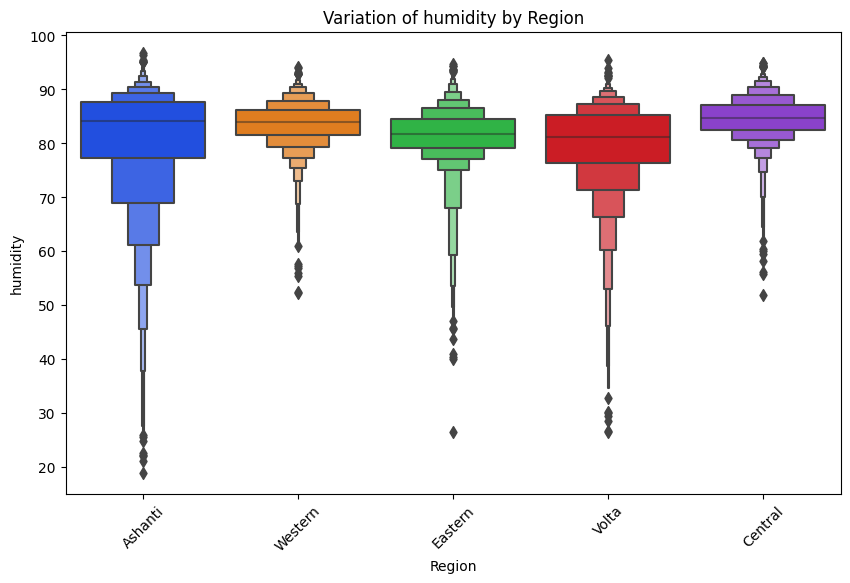

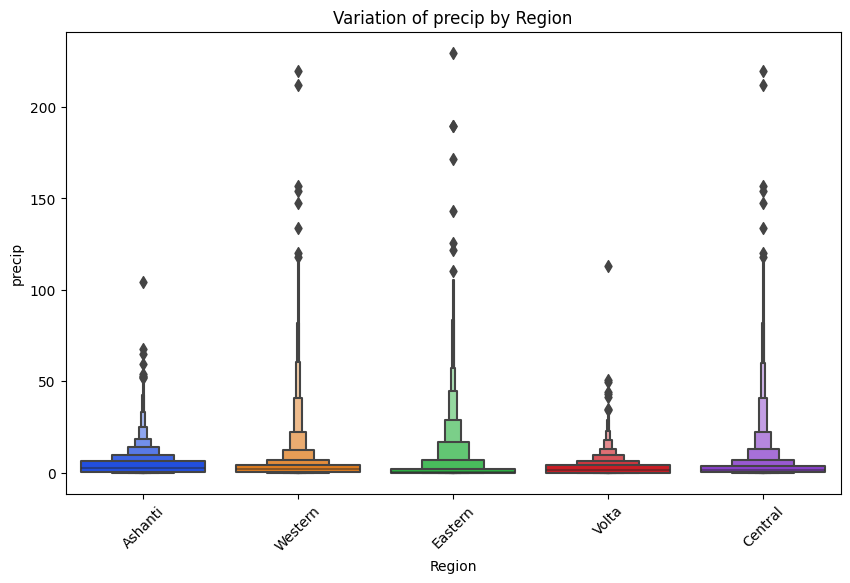

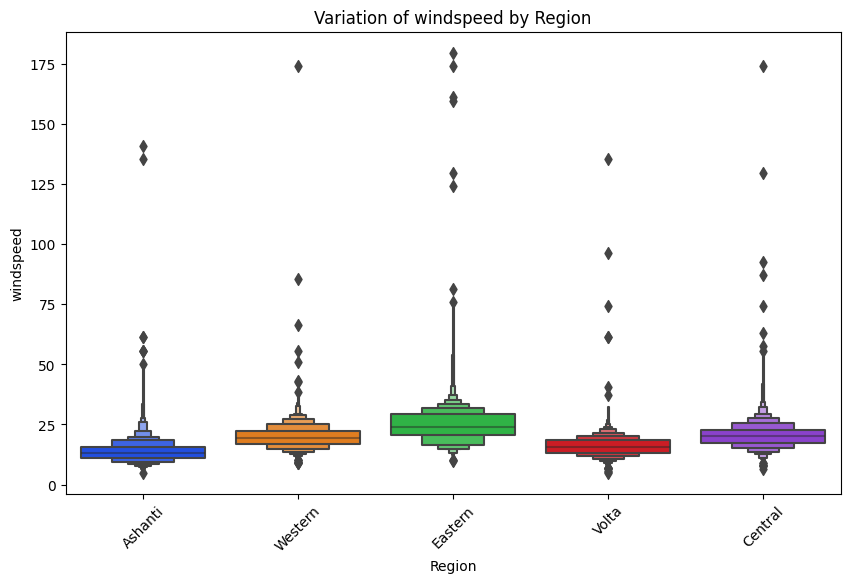

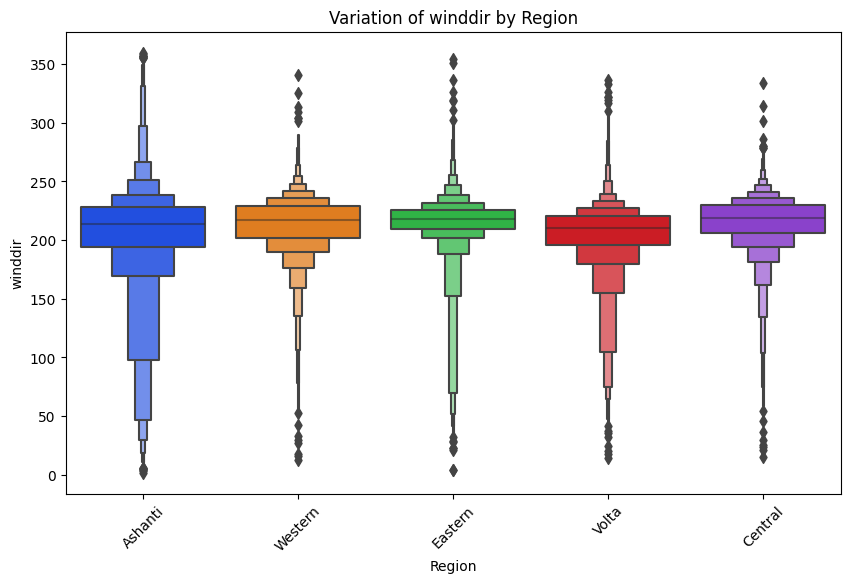

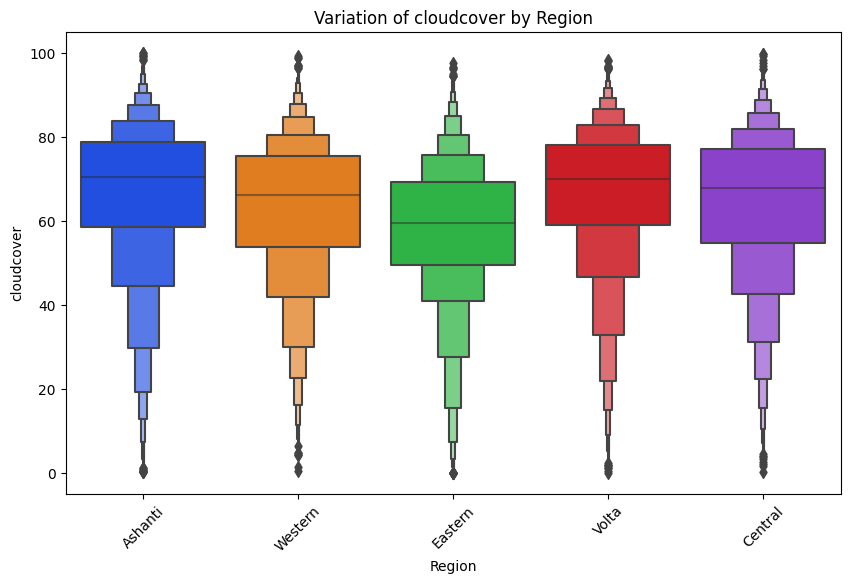

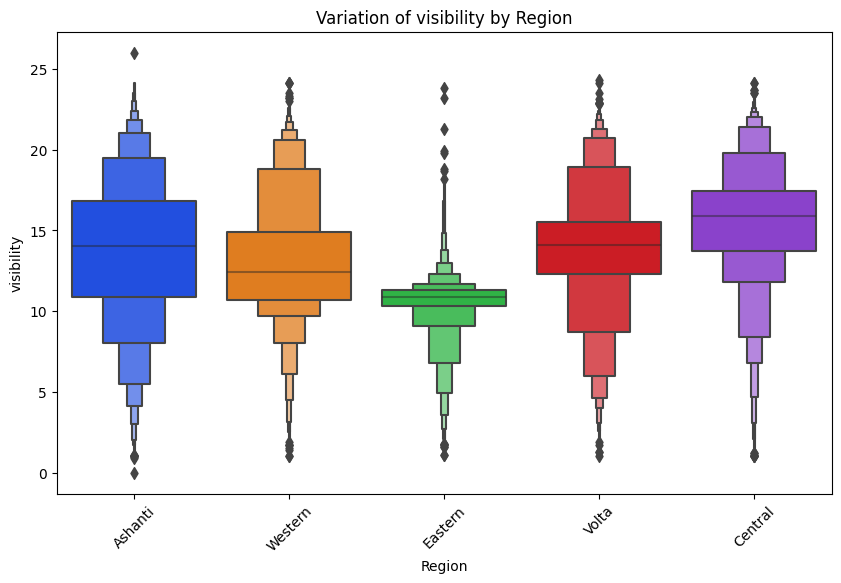

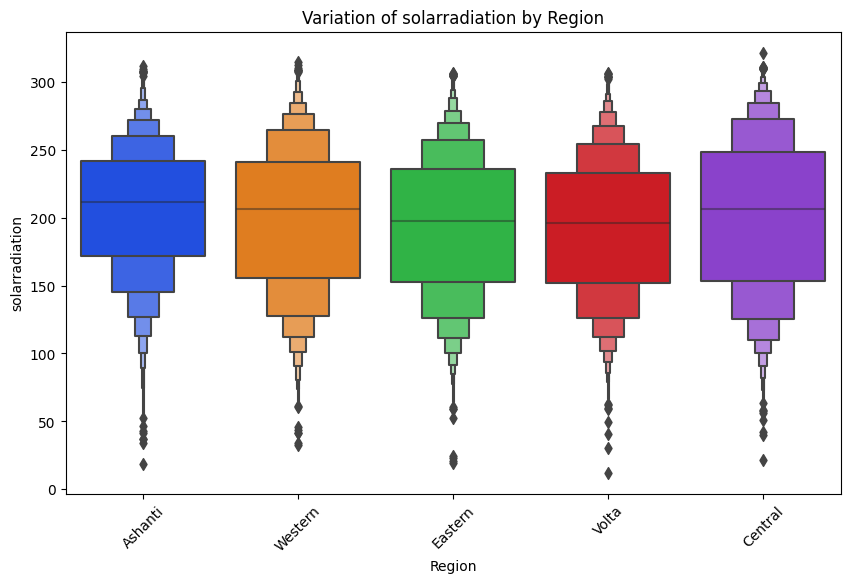

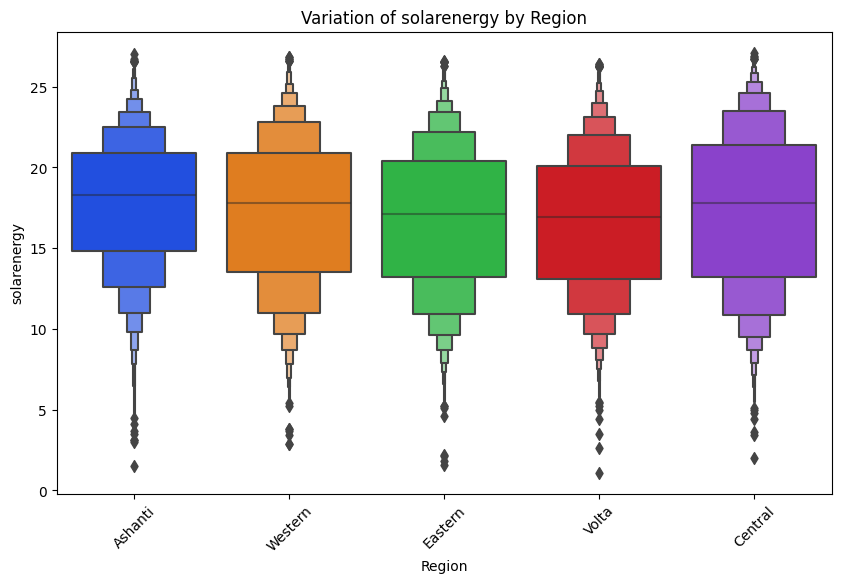

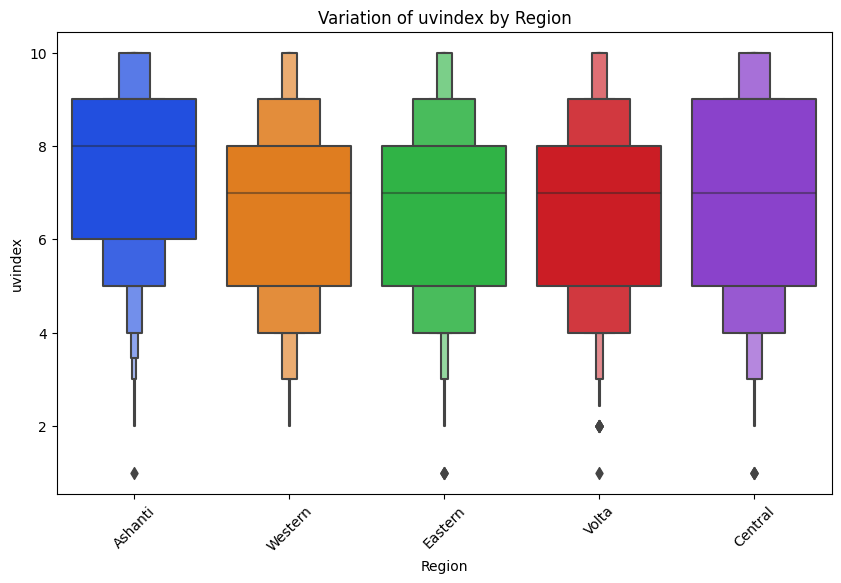

In [32]:
# How does weather vary across different cocoa growing regions in Ghana?

#Most of the weather variables are similar across Ghana.

#However, the Central region is the windiest, and Ashanti receives the highest amount of rainfall.

# regions = weather_df['Region'].unique()

# Select the weather variables for plotting
weather_variables = ['temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir',
                     'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex']

# Iterate over each weather variable
for variable in weather_variables:
    plt.figure(figsize=(10, 6))
    
    # Create boxen plots for each region
    sns.boxenplot(x='Region', y=variable, data=weather_df)
    
    plt.title(f'Variation of {variable} by Region')
    plt.xlabel('Region')
    plt.ylabel(variable)
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    plt.show()

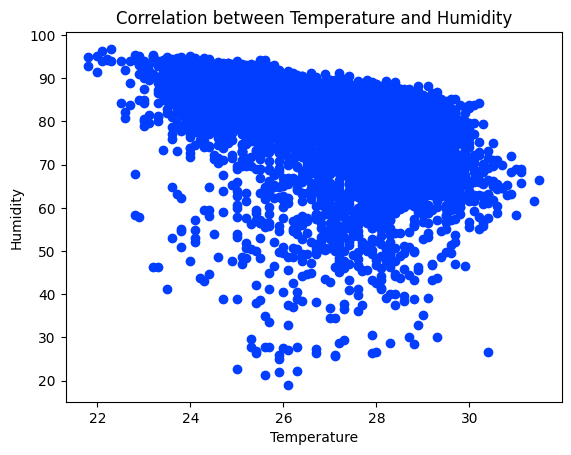

In [33]:
# Is there correlation between temperature(temp) and humidity(humidity)?
# There moderate negative correlation between temperature (temp) and humidity (humidity) in the weather dataset.

plt.scatter(weather_df['temp'], weather_df['humidity'])

# Set the axis labels and title
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Correlation between Temperature and Humidity')

# Show the plot
plt.show()

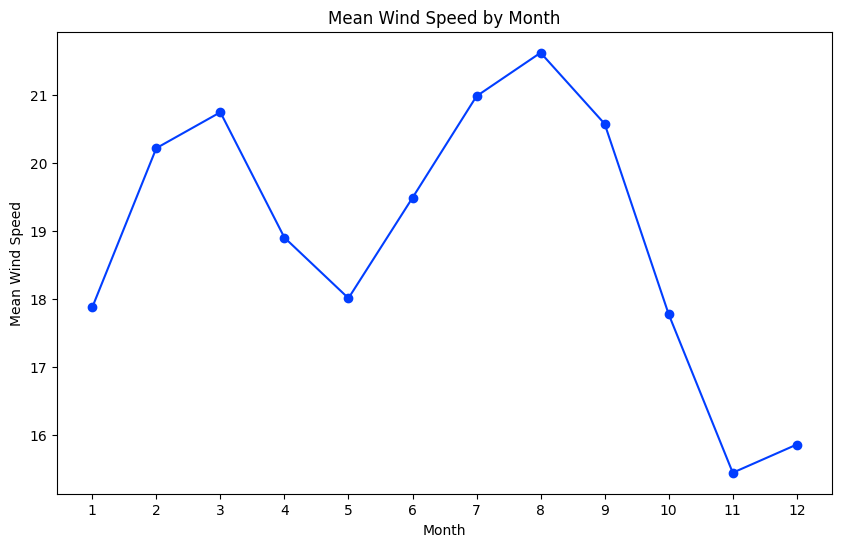

In [39]:
# Are there any noticeable patterns or trends in wind speed (windspeed) over time? Do certain months or seasons have higher wind speeds?
# It looks like the most windest months are February to September, 
# The wind speed tends to be relatively low during the months of November and December.
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Extract month from the 'Date' column
weather_df['Month'] = weather_df['Date'].dt.month

# Group the data by month and calculate the mean wind speed
monthly_mean_wind_speed = weather_df.groupby('Month')['windspeed'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
monthly_mean_wind_speed.plot(marker='o')
plt.title('Mean Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed')
plt.xticks(range(1, 13))
plt.show()

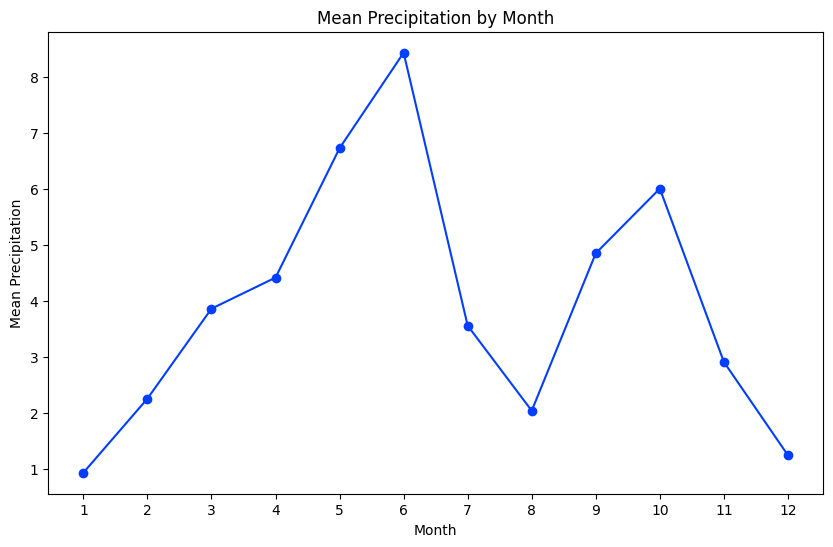

In [42]:
# Are there any noticeable patterns or trends in precipitation (precipitation)? Do certain months or seasons experience higher levels of precipitation?
# June, May, October and April receive the most amount of rain.
# Winter months (December, January, February) receive relatively lower amounts of rainfall compared to other months.

# Calculate the mean precipitation by month
monthly_precipitation = weather_df.groupby('Month')['precip'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_precipitation.index, monthly_precipitation.values, marker='o')
plt.title('Mean Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Mean Precipitation')
plt.xticks(range(1, 13))
plt.show()

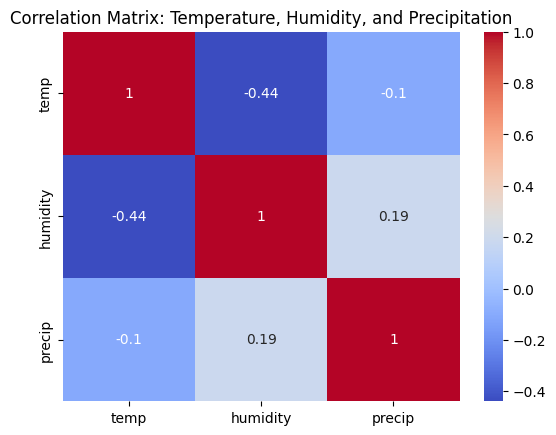

In [46]:
# Do higher temperatures lead to increased humidity or precipitation?
# No, higher temperature are associated with decreased humidity and slightly lower temperature.

# Select the relevant variables
data = weather_df[['temp', 'humidity', 'precip']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.title('Correlation Matrix: Temperature, Humidity, and Precipitation')
plt.show()
